# Vectors








## Scalars and Vectors

### *What is a scalar?*

A **scalar** defines the amount of something in one dimension.  They are accompanied by a unit which signifies the dimension in particular.  We learn amount dimensions as a concept of length (e.g., meters), but a dimension can be generally described as one aspect of a thing.

```{figure-md} car-fig
<img src="https://upload.wikimedia.org/wikipedia/commons/6/6c/1966_Toyota_Corolla_02.jpg" alt="car" width="450px">

Image Credit: Wikipedia.
```

For example, your car (see Figure {numref}`{number}<car-fig>`) has multiple dimensions:

- mass --> $1500\ {\rm kg}$
- age --> $4\ {\rm yr}$
- gas tank --> $10\ {\rm gal}$
- gas mileage --> $40\ {\rm mpg}$

Each of these dimensions for describing the car has a number followed by the unit, which makes up the **scalar quantity**.

### Scalar arithmetic

Scalar quantities can only be combined (or separated) when the have the same unit.  For example, a $50$-${\rm min}$ class that ends $10\ {\rm min}$ early lasts for $50\ {\rm min} - 10\ {\rm min} = 40\ {\rm min}$.

If you were told that the class ended $600\ {\rm sec}$ early, **you cannot combine (or separate) the quantities directly**.  Instead, you must *first* convert to a common unit, then you can proceed as before.

\begin{align}
50\ {\rm min} - 600\ {\rm sec} &=, \\
50\ {\rm min} - \left[\frac{600\ {\rm sec}}{1}\times \frac{1\ {\rm min}}{60\ {\rm sec}}\right] &= , \\
50\ {\rm min} - 10\ {\rm min} &= 40\ {\rm min}.
\end{align}

```{note}
You can write in `math mode` using `$ $` or using the `\begin{align} \end{align}` environment.  See the source of this notebook (rocketship on Google Colab) for more details.
```

In [ ]:
class_time = 50 #class time in minutes
early_time = 600 #amount of time early (in sec)

# must convert the early time from sec -- > min
class_time_early = class_time - (early_time/60)
print("The class ends %2.0f minutes early." % class_time_early)

The class ends 40 minutes early.


Scalars can also be multiplied and divided, where units can be combined under the appropriate operation.  For example, energy is described by the amount of force applied (i.e. multiplied) over a distance, or $E = Fd$.  

Suppose you pushed a 0.5-${\rm kg}$ box with a force of 1 $\rm Newton$ horizontally across the floor for 5 meters (see Figure {numref}`{number}<stick-push>`). Then, you expended $5\ {\rm N\cdot }m$ of energy.  The unit is combined to form a Newton-meter, or $\rm Joule$.

```{figure-md} stick-push
<img src="https://stickmanphysics.com/wp-content/uploads/2019/09/PushBoxStickManPhysics.gif" alt="stick push" width="450px">

Image Credit: stickmanphysics.com.
```

If you traveled to Dallas from Commerce (${\sim}60\ {\rm mi}$ away) in your car and the trip took $1\ {\rm h}$.  Then your average speed has is a  derived scalar quantity of $60\ {\rm mi/h}$.

### *What is a vector?*

A **vector** combines scalar quantities as a new object that delineates the quantities by their dimension.  A unit vector represents a single step along a dimensional axis and is signified using the `hat` (or $\hat{}$) symbol over the variable for that axis.  For example, 1 unit step along the x-axis is represented by $\hat{x}$, which can be written as `$\hat{x}$` a the text cell in your Jupyter notebook.

---
Consider a chessboard, where players designate letters and numbers to identify a piece at a particular location on the board.  The chess pieces move as vectors to traverse the chessboard.  

The knight moves in an $L$-shaped pattern that can include moving the piece either: one space horizontally, 2 spaces vertically or 2 spaces horizontally, 1 space vertically.  Both of these choices represent a vector when we consider the initial and final locations of the knight.

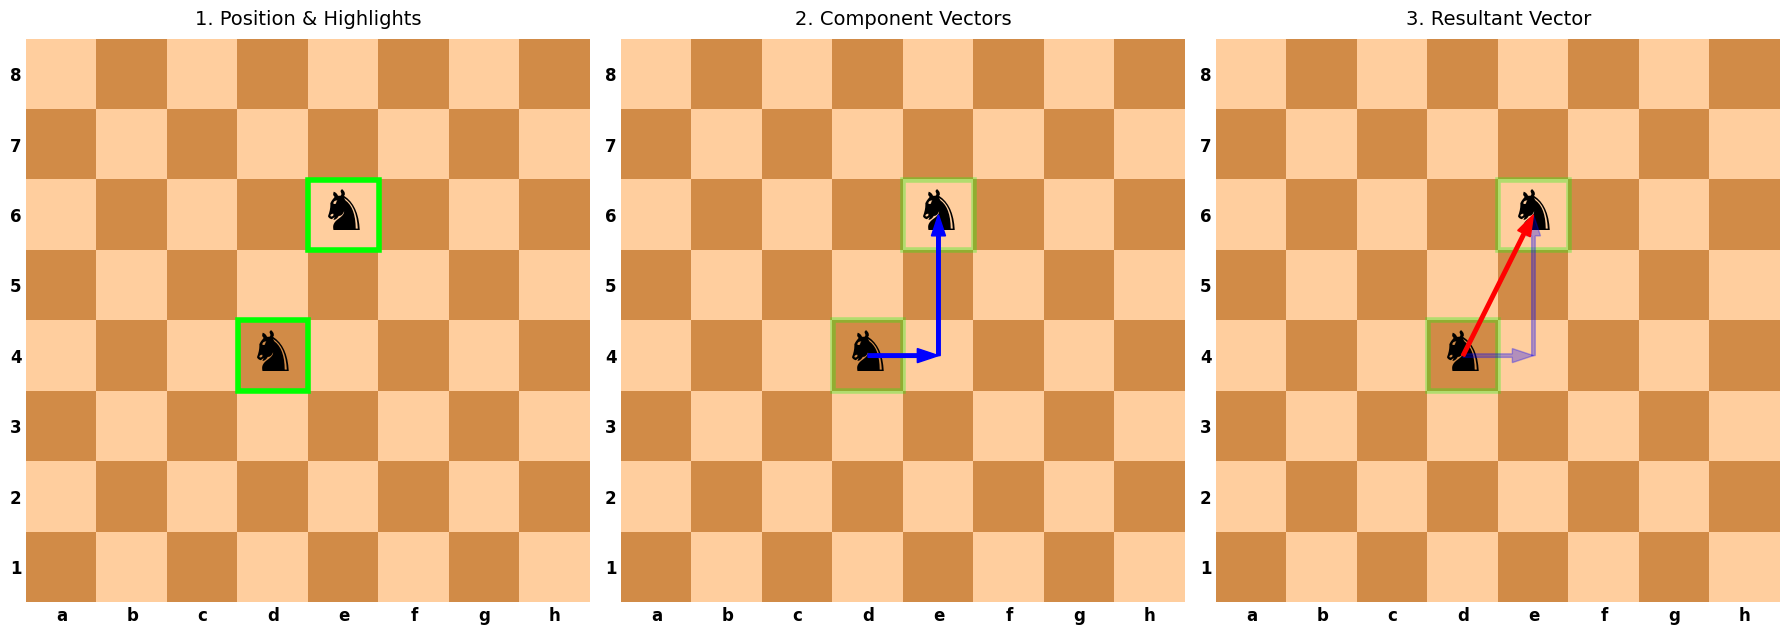

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.patches as patches

def draw_vector_panels():
    # 1. Setup Data and Colors
    dx, dy = np.meshgrid(np.arange(8), np.arange(8))
    board_grid = (dx + dy) % 2

    dark_color = '#D18B47'
    light_color = '#FFCE9E'
    cmap = ListedColormap([dark_color, light_color])

    files = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
    ranks = ['1', '2', '3', '4', '5', '6', '7', '8']

    # Vector/Piece Coordinates
    x0, y0 = 3., 3.  # Start at d4
    kx, ky = 1, 2    # Knight move (1 right, 2 up)

    # 2. Create Subplots (1 Row, 3 Cols)
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Helper function to draw the base board on any given axis
    def setup_board(ax):
        ax.imshow(board_grid, cmap=cmap, origin='lower')
        ax.set_xticks(np.arange(8))
        ax.set_xticklabels(files, fontsize=12, weight='bold')
        ax.set_yticks(np.arange(8))
        ax.set_yticklabels(ranks, fontsize=12, weight='bold')
        ax.tick_params(axis='both', which='both', length=0)

        # Clean borders
        for spine in ax.spines.values():
            spine.set_visible(False)

        # Place Pieces (Knights)
        # Using ha='center' aligns the text automatically to the grid center
        ax.text(x0, y0, '♞', color='k', fontsize=40, ha='center', va='center')
        ax.text(x0+kx, y0+ky, '♞', color='k', fontsize=40, ha='center', va='center')

    # --- PANEL 1: Pieces + Border Highlights ---
    ax1 = axes[0]
    setup_board(ax1)
    ax1.set_title("1. Position & Highlights", fontsize=14, pad=10)

    # Add Highlights (Rectangles around start and end cells)
    # Note: (x-0.5, y-0.5) is the bottom-left corner of a cell centered at (x,y)
    rect_start = patches.Rectangle((x0-0.5, y0-0.5), 1, 1, fill=False, edgecolor='#00FF00', linewidth=4)
    rect_end = patches.Rectangle((x0+kx-0.5, y0+ky-0.5), 1, 1, fill=False, edgecolor='#00FF00', linewidth=4)
    ax1.add_patch(rect_start)
    ax1.add_patch(rect_end)

    # --- PANEL 2: Add Component Vectors (Blue) ---
    ax2 = axes[1]
    setup_board(ax2)
    ax2.set_title("2. Component Vectors", fontsize=14, pad=10)

    # Keep highlights (optional, for continuity)
    ax2.add_patch(patches.Rectangle((x0-0.5, y0-0.5), 1, 1, fill=False, edgecolor='#00FF00', linewidth=4, alpha=0.3))
    ax2.add_patch(patches.Rectangle((x0+kx-0.5, y0+ky-0.5), 1, 1, fill=False, edgecolor='#00FF00', linewidth=4, alpha=0.3))

    # Blue Arrows
    # Horizontal component
    ax2.arrow(x0, y0, kx, 0, color='b', ls='-', width=0.05, length_includes_head=True, head_width=0.2, zorder=5)
    # Vertical component (starts where horizontal ended)
    ax2.arrow(x0+kx, y0, 0, ky, color='b', ls='-', width=0.05, length_includes_head=True, head_width=0.2, zorder=5)

    # --- PANEL 3: Add Resultant Vector (Red) ---
    ax3 = axes[2]
    setup_board(ax3)
    ax3.set_title("3. Resultant Vector", fontsize=14, pad=10)

    # Ghost previous elements
    ax3.add_patch(patches.Rectangle((x0-0.5, y0-0.5), 1, 1, fill=False, edgecolor='#00FF00', linewidth=4, alpha=0.3))
    ax3.add_patch(patches.Rectangle((x0+kx-0.5, y0+ky-0.5), 1, 1, fill=False, edgecolor='#00FF00', linewidth=4, alpha=0.3))
    ax3.arrow(x0, y0, kx, 0, color='b', ls='-', width=0.05, length_includes_head=True, head_width=0.2, zorder=5, alpha=0.3)
    ax3.arrow(x0+kx, y0, 0, ky, color='b', ls='-', width=0.05, length_includes_head=True, head_width=0.2, zorder=5, alpha=0.3)

    # Red Resultant Arrow
    ax3.arrow(x0, y0, kx, ky, color='r', ls='-', width=0.05, length_includes_head=True, head_width=0.2, zorder=6)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    draw_vector_panels()

A vector is also described as an object that has both magnitude **and** direction (see Figure {numref}`{number}<victor-vector-fig>`).

```{figure-md} victor-vector-fig
<img src="https://static.wikia.nocookie.net/despicableme/images/4/46/Vector_wallpaper.jpeg" alt="Victor Vector"  width="250px">

Victor "Vector" Perkins demonstrating that he has both magnitude and direction. Image Credit: Illumination: Despicable Me.
```

Physical quantities specified by giving a number of units (i.e., magnitude) and a direction (i.e., angle or up/down/left/right) are called **vector quantities**. Examples include:

- position,
    - displacement (change in position),
- velocity (change in position per time),
- acceleration (change in velocity per time),
- force,
- torque.

Vectors can be combined together to make a new vector or multiplied by a scalar to create a vector of a new length.  The chessboard example above showed the resultant vector is composed by the addition of two component vectors.

Vectors are distinguished from scalars using an arrow over the variable.  Suppose we can identify the **position vector** of an object because it is $2\ {\rm km}$ due east, then we can write the vector $\vec{m} = 2 \hat{x}\ {\rm km}$, where $\hat{x}$ represents the direction `due east` or along the positive x-axis.  The $\hat{x}$ is a unit vector with *a length equal to 1*.

```{note}
In your Jupiter notebook Markdown (text) cell, the $\vec{m}$ is represented by `$\vec{m}$`, and the $\hat{x}$ is represented by `$\hat{x}$`.  Be sure to use The `$ $` around your [LaTeX](https://pages.uoregon.edu/torrence/391/labs/LaTeX-cheat-sheet.pdf) symbols so they render properly.  Click the link to see a cheat sheet for LaTeX commands.
```

The object $\vec{m}$ is a vector because it has a magnitude ($2\ {\rm km}$) and a direction ($\hat{x}$). The magnitude can be written equivalently as $m \equiv |\vec{m}|$

- **What is the vector for an object that is $2\ {\rm km}$ due west?**
- **What is the vector for an object that is $2\ {\rm km}$ due north/south?**

Note that we have chosen the $x$ in $\hat{x}$ arbitrarily, where we could have used any other symbol.  You might see that other textbooks use $\hat{i}$ instead.  If you dealing with a vector with an unknown magnitude in the positive $x$ direction, then you can see where $\vec{m} = x \hat{i}$ could be useful.

See the python script below, where it shows how to represent the vector $\vec{m}= 2\hat{x}$ using the plotting library `matplotlib`.

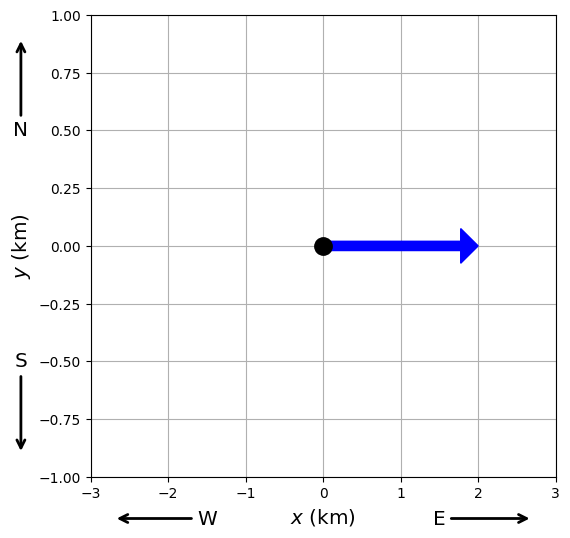

In [49]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.grid(True,zorder=2)

#create m-vector using python
x0,y0,dx,dy = 0,0,2,0
ax.arrow(x0,y0,dx,dy,color='b', ls='-', width=0.04, length_includes_head=True, head_width=0.15,zorder=4)
ax.plot(x0,y0,'k.',ms=25,zorder=5)

# -------------------------------------------------
# Cardinal arrows in whitespace near x-axis label
# -------------------------------------------------
arrow_kw = dict(arrowprops=dict(arrowstyle='->', lw=2),
                xycoords='axes fraction',
                textcoords='axes fraction', fontsize='x-large',
                zorder=6)
# East arrow (+x, right)
ax.annotate('E', xy=(0.95, -0.09), xytext=(0.75, -0.09),
            ha='center', va='center', **arrow_kw)
# West arrow (-x, left)
ax.annotate('W',xy=(0.05, -0.09), xytext=(0.25, -0.09),
            ha='center', va='center', **arrow_kw)
# North arrow (+y, up)
ax.annotate('N',xy=(-0.15, 0.95), xytext=(-0.15, 0.75),
            ha='center', va='center', **arrow_kw)
# South arrow (-y, down)
ax.annotate('S',xy=(-0.15, 0.05), xytext=(-0.15, 0.25),
            ha='center', va='center', **arrow_kw)

ax.set_xlim(-3, 3)
ax.set_ylim(-1, 1)
ax.set_ylabel('$y$ (km)',fontsize='x-large')
ax.set_xlabel('$x$ (km)',fontsize='x-large')

plt.show()

You can use the python code below as a *template* to plot your vectors in this chapter. **Be sure to modify the limits/labels as needed.**

```{code-block} python
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.grid(True,zorder=2)

#create vector using python
x0,y0,dx,dy = 0,0,2,0
ax.arrow(x0,y0,dx,dy,color='b', ls='-', width=0.04, length_includes_head=True, head_width=0.15,zorder=4)
ax.plot(x0,y0,'k.',ms=25,zorder=5)

ax.set_xlim(-3, 3)
ax.set_ylim(-1, 1)
ax.set_ylabel('$y$ (km)',fontsize='x-large')
ax.set_xlabel('$x$ (km)',fontsize='x-large')

plt.show()
```

In general, we define $\vec{D}$ as the **displacement** vector, where it measures the change in a position vector.  The displacement vector can be the resultant vector of two other vectors $\vec{A}$ and $\vec{B}$.  Figure {numref}`{number}<vector-relations-fig>` shows how these 2 vectors can be oriented relative to each other.

```{figure-md} vector-relations-fig
<img src="https://openstax.org/apps/image-cdn/v1/f=webp/apps/archive/20250916.165151/resources/b82f588387208ba48921020256bbddb5538f7f0f" alt="vector relations"  width="450px">

Image Credit: OpenStax.
```

Suppose that you're walking from your tent at position $A$ and going to a pond at position $B$.  It's easier to keep track of your displacement $\vec{D}$ by using subscripts denoting the intended source location and final destination (see Figure {numref}`{number}<displacement-path-fig>`).


```{figure-md} displacement-path-fig
<img src="https://openstax.org/apps/image-cdn/v1/f=webp/apps/archive/20250916.165151/resources/eb27b13121051b69a7a5d38d4158f47e7bf1f9d5" alt="displacement path"  width="450px">

Image Credit: OpenStax.
```

Mathematically, $\vec{D}_{AB}$ represents the displacement vector from $A$ to $B$, where the opposite $\vec{D}_{BA} = -\vec{D}_{AB}$ because you would only need to walk in the opposite ($-$) direction.  We can also say that $\vec{D}_{BA}$ is **antiparallel** to $\vec{D}_{AB}$.

- Two vectors that have *identical* directions are **parallel** to each other.
- Two vectors that are **perpendicular** to each other are also said to be *orthogonal* vectors.

### Algebra of Vectors in 1D

```{figure-md} displacement-example-fig
<img src="https://openstax.org/apps/image-cdn/v1/f=webp/apps/archive/20251118.192121/resources/4bdea90930046d769c6876336fdbd6f966ad4df7" alt="displacement example"  width="600px">

Image Credit: OpenStax.
```

Figure {numref}`{number}<displacement-example-fig>`  shows three scenarios for your friend who walks from the campsite to the fishing pond.  He wants to walk from point A to B, or have a displacement vector $\vec{D}_{AB}$.  Let's see how is vector is modified when he

1. stops to rest at point C,
2. realizes that he dropped his prize lure and has to go back to a point D,
3. continues from point D and arrives at the fishing pond at point B.

The python script below represents the vector $\vec{D}_{AB}$, where I've chosen a $45^\circ$ angle *for illustration only*.



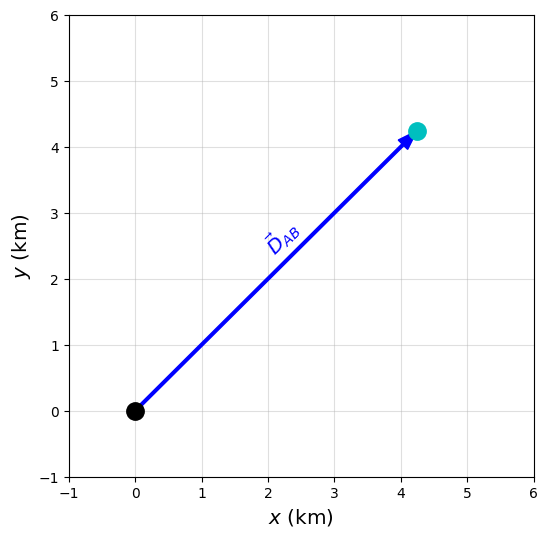

In [121]:
import matplotlib.pyplot as plt
import numpy as np

fs='x-large'

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.grid(True,zorder=2,alpha=0.4)

#components of a unit vector u
theta = np.pi/4
ux, uy = np.cos(theta), np.sin(theta)

#Vector D_AB = 6*u
mag_D_AB = 6
x0,y0,dx,dy = 0,0,mag_D_AB*ux,mag_D_AB*uy
ax.arrow(x0,y0,dx,dy,color='b', ls='-', width=0.04, length_includes_head=True, head_width=0.2,zorder=4)
ax.plot(x0,y0,'k.',ms=25,zorder=5)
ax.plot(x0+mag_D_AB*ux,y0+mag_D_AB*uy,'c.',ms=25,zorder=5)
ax.text(dx/2-0.25,dy/2+0.25,'$\\vec{D}_{AB}$',rotation=45,fontsize=fs,color='b')

ax.set_xlim(-1, 6)
ax.set_ylim(-1, 6)
ax.set_ylabel('$y$ (km)',fontsize='x-large')
ax.set_xlabel('$x$ (km)',fontsize='x-large')

plt.show()

Your friend rests at point C, which is $3/4$ of the way to the pond.  We also know that the full distance from the campsite to the pond is $6\ {\rm km}$.  **What is his displacement vector $\vec{D}_{AC}$ when he stops to rest?**

Notice that the vector in panel (a) is not along the x-axis, but in a northeasterly direction.  In this question, we apply a unit vector $\hat{u}$ so that we can define:

\begin{align}
\vec{D}_{AB} = 6\hat{u}\ {\rm km}.
\end{align}

There could be some transformation to decompose $\hat{u}\rightarrow x\hat{i} + y\hat{j}$, but we do not need to know (in this case) as long as we express all other vectors either *parallel* or *antiparallel* to $\hat{u}$.

**Do you think $\vec{D}_{AC}$ is parallel or antiparallel to $\vec{D}_{AB}$?**

Since your fiend is walking in the direction $\hat{u}$, his vector at point C is parallel to the path from the campsite to the pond.  Then we can *scale* the original vector by the fraction of the total distance traveled (i.e., $3/4$ (or $0.75$) of the way).  

---
*Scaling a vector*

To scale a vector, you simply multiply by a scalar (i.e., a number), let's call it $\alpha$. If $\alpha$ is:

- $< 1$, then it shrinks the vector.
- $=1$, then it copies the vector exactly.
- $>1$, then it enlarges the vector.

In all three cases, the direction of the new vector is preserved (i.e., unchanged) relative to the old vector, although the magnitude of the new vector can be different.

---

We can represent the vector $\vec{D}_{AC}$ as

\begin{align}
\vec{D}_{AC} &= 0.75 \vec{D}_{AB},\\
&= 4.5\hat{u}\ {\rm km}.
\end{align}

Note that we have 2 ways to represent the new vector.

The magnitude of $\vec{D}_{AB}$ is represented by $|\vec{D}_{AB}| = 6\ {\rm km}$.  We found the second form by multiplying the scalar $\alpha = 0.75$ by the scalar $|\vec{D}_{AB}|$.  Therefore we know the magnitude of $\vec{D}_{AC}$ is

$$ |\vec{D}_{AC}| = 4.5\ {\rm km}. $$

In general,

- a **scalar multiplied by a vector** creates a new vector, $\vec{B} = \alpha\vec{A}$.
- a **scalar multiplied by a scalar** creates a new scalar, $|\vec{B}| = \alpha|\vec{A}|$.

The python script below represents the vectors $\vec{D}_{AB}$ and $\vec{D}_{AC}$, graphically.

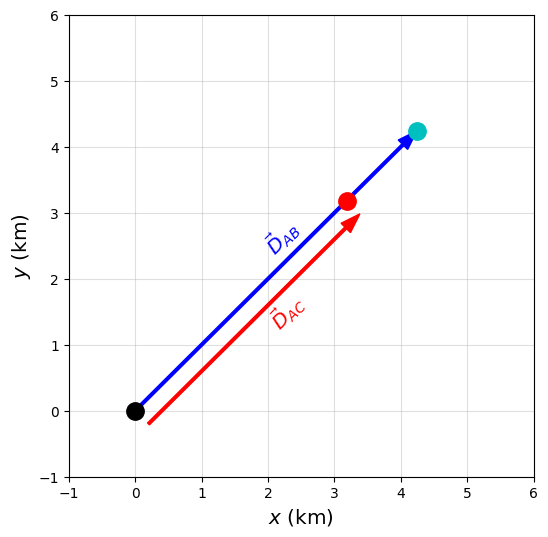

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fs = 'x-large'

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.grid(True,zorder=2,alpha=0.4)

#components of a unit vector u
theta = np.pi/4
ux, uy = np.cos(theta), np.sin(theta)

#Vector D_AB = 6*u
mag_D_AB = 6
x0,y0,dx,dy = 0,0,mag_D_AB*ux,mag_D_AB*uy
ax.arrow(x0,y0,dx,dy,color='b', ls='-', width=0.04, length_includes_head=True, head_width=0.2,zorder=4)
ax.text(dx/2-0.25,dy/2+0.25,'$\\vec{D}_{AB}$',rotation=45,fontsize=fs,color='b')

#Vector D_AC = 0.75*D_AB
mag_D_AC = 0.75
xshift, yshift = 0.2, -0.2 #shifts only so the both vectors are visible
x0,y0,dx,dy = 0,0,mag_D_AC*mag_D_AB*ux,mag_D_AC*mag_D_AB*uy
ax.arrow(x0+xshift,y0+yshift,dx,dy,color='r', ls='-', width=0.04, length_includes_head=True, head_width=0.2,zorder=4)
ax.text(dx/2+0.35,dy/2-0.35,'$\\vec{D}_{AC}$',rotation=45,fontsize=fs,color='r')

ax.plot(x0,y0,'k.',ms=25,zorder=5)
ax.plot(x0+mag_D_AB*ux,y0+mag_D_AB*uy,'c.',ms=25,zorder=5)
ax.plot(x0+mag_D_AC*mag_D_AB*ux,y0+mag_D_AC*mag_D_AB*uy,'r.',ms=25,zorder=5)

ax.set_xlim(-1, 6)
ax.set_ylim(-1, 6)
ax.set_ylabel('$y$ (km)',fontsize='x-large')
ax.set_xlabel('$x$ (km)',fontsize='x-large')

plt.show()

Your friend now realizes that he dropped his prize lure and has to go back to look for it and finds it at a a point D that is $1.2\ {\rm km}$ from point C.  We can represent his new path as a vector $\vec{D}_{CD}$.

**Do you think $\vec{D}_{CD}$ is parallel or antiparallel to $\vec{D}_{AB}$?**

Since he had to retrace his steps, the vector $\vec{D}_{CD}$ will have a direction that is opposite to $\vec{D}_{AC}$ (and $\vec{D}_{AB}$.

We can represent the vector $\vec{D}_{CD}$ as

\begin{align}
\vec{D}_{CD} = -\frac{1.2}{6} \hat{u},
&=-0.2 \vec{D}_{AB}.
\end{align}

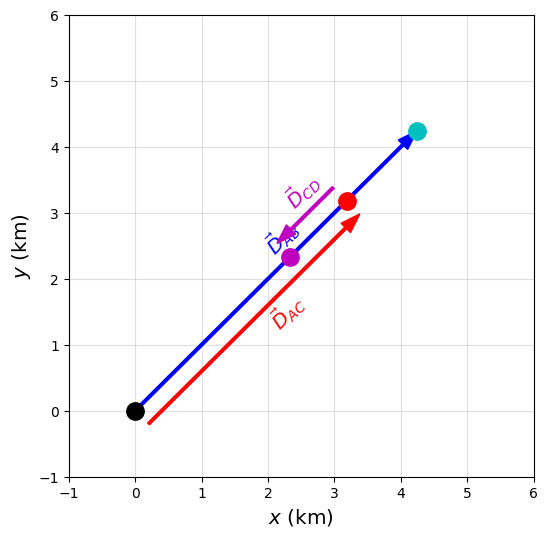

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fs = 'x-large'

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.grid(True,zorder=2,alpha = 0.4)

#components of a unit vector u
theta = np.pi/4
ux, uy = np.cos(theta), np.sin(theta)

#Vector D_AB = 6*u
mag_D_AB = 6
x0,y0,AB_dx,AB_dy = 0,0,mag_D_AB*ux,mag_D_AB*uy
ax.arrow(x0,y0,AB_dx,AB_dy,color='b', ls='-', width=0.04, length_includes_head=True, head_width=0.2,zorder=4)
ax.text(AB_dx/2-0.25,AB_dy/2+0.25,'$\\vec{D}_{AB}$',rotation=45,fontsize=fs,color='b',zorder=4)

#Vector D_AC = 0.75*D_AB
mag_D_AC = 0.75
xshift, yshift = 0.2, -0.2 #shifts only so the both vectors are visible
x0,y0,AC_dx,AC_dy = 0,0,mag_D_AC*mag_D_AB*ux,mag_D_AC*mag_D_AB*uy
ax.arrow(x0+xshift,y0+yshift,AC_dx,AC_dy,color='r', ls='-', width=0.04, length_includes_head=True, head_width=0.2,zorder=4)
ax.text(AC_dx/2+0.35,AC_dy/2-0.35,'$\\vec{D}_{AC}$',rotation=45,fontsize=fs,color='r')

#Vector D_CD = -0.2*D_AB
mag_D_CD = -0.2
xshift, yshift = -0.2, 0.2 #shifts only so the both vectors are visible
x0,y0,CD_dx,CD_dy =0,0,mag_D_CD*mag_D_AB*ux,mag_D_CD*mag_D_AB*uy
ax.arrow(AC_dx+xshift,AC_dy+yshift,CD_dx,CD_dy,color='m', ls='-', width=0.04, length_includes_head=True, head_width=0.2,zorder=4)
ax.text(AC_dx+2*CD_dx/3-0.45,AC_dy+2*CD_dy/3+0.45,'$\\vec{D}_{CD}$',rotation=45,fontsize=fs,color='m')

x0,y0 = 0,0
ax.plot(x0,y0,'k.',ms=25,zorder=5)
ax.plot(x0+AB_dx,y0+AB_dy,'c.',ms=25,zorder=5)
ax.plot(x0+AC_dx,y0+AC_dy,'r.',ms=25,zorder=5)
ax.plot(x0+AC_dx+CD_dx,y0+AC_dy+CD_dy,'m.',ms=25,zorder=5)

ax.set_xlim(-1, 6)
ax.set_ylim(-1, 6)
ax.set_ylabel('$y$ (km)',fontsize='x-large')
ax.set_xlabel('$x$ (km)',fontsize='x-large')

plt.show()

Furthermore, we can represent your friends displacement vector relative to:

- the campsite by $\vec{D}_{AD}$, or
- the fishing pond $\vec{D}_{DB}$.

Since your friend had to turn back, he wants to know which location (campsite or fishing hole) is closer.  He's not much of a hiker, and just wants to go to the closer location.

We can find either vector $\vec{D}_{AD}$ or $\vec{D}_{DB}$ using a combination of the vectors we already know.  We can deduce $\vec{D}_{AD}$ by the addition (or difference) of $\vec{D}_{AB}$ with $\vec{D}_{AC}$ and $\vec{D}_{CD}$.  Let's start by defining:

\begin{align}
\vec{D}_{AD} = \vec{D}_{AC} + \vec{D}_{CD}.
\end{align}

The vector $\vec{D}_{AD}$ simply represents your friend's total path *accounting for a change in direction.* Through substitution, we have

\begin{align}
\vec{D}_{AD} &= 0.75 \vec{D}_{AB} - 0.2\vec{D}_{AB},\\
&= 0.55\vec{D}_{AB}, \\
&= 3.3 \hat{u}\ {\rm km}.
\end{align}

We can find $\vec{D}_{DB}$ through another deduction by,

\begin{align}
\vec{D}_{DB} &= \vec{D}_{AB} - \vec{D}_{AD},\\
&= 0.45\vec{D}_{AB}, \\
&= 2.7 \hat{u}\ {\rm km}.
\end{align}

Together, we can take the magnitude of each vector to find that

- $|\vec{D}_{AD}| = 3.3\ {\rm km}$ back to the campsite, and
- $|\vec{D}_{AD}| = 2.7\ {\rm km}$ to the pond.

It looks like your friend is going fishing after all.

**Does this make sense?**

We should expect that $\vec{D}_{AD} + \vec{D}_{DB} = \vec{D}_{AB}$, which we can see this in our graph.

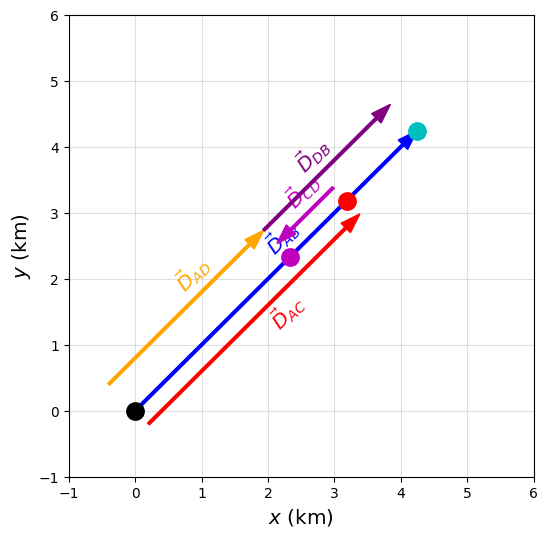

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fs = 'x-large'

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.grid(True,zorder=2,alpha=0.4)

#components of a unit vector u
theta = np.pi/4
ux, uy = np.cos(theta), np.sin(theta)

#Vector D_AB = 6*u
mag_D_AB = 6
x0,y0,AB_dx,AB_dy = 0,0,mag_D_AB*ux,mag_D_AB*uy
ax.arrow(x0,y0,AB_dx,AB_dy,color='b', ls='-', width=0.04, length_includes_head=True, head_width=0.2,zorder=4)
ax.text(AB_dx/2-0.25,AB_dy/2+0.25,'$\\vec{D}_{AB}$',rotation=45,fontsize=fs,color='b',zorder=4)

#Vector D_AC = 0.75*D_AB
mag_D_AC = 0.75#D_AB
xshift, yshift = 0.2, -0.2 #shifts only so the both vectors are visible
x0,y0,AC_dx,AC_dy = 0,0,mag_D_AC*mag_D_AB*ux,mag_D_AC*mag_D_AB*uy
ax.arrow(x0+xshift,y0+yshift,AC_dx,AC_dy,color='r', ls='-', width=0.04, length_includes_head=True, head_width=0.2,zorder=4)
ax.text(AC_dx/2+0.35,AC_dy/2-0.35,'$\\vec{D}_{AC}$',rotation=45,fontsize=fs,color='r')

#Vector D_CD = -0.2*D_AB
mag_D_CD = -0.2 #D_AB
xshift, yshift = -0.2, 0.2 #shifts only so the both vectors are visible
x0,y0,CD_dx,CD_dy =0,0,mag_D_CD*mag_D_AB*ux,mag_D_CD*mag_D_AB*uy
ax.arrow(AC_dx+xshift,AC_dy+yshift,CD_dx,CD_dy,color='m', ls='-', width=0.04, length_includes_head=True, head_width=0.2,zorder=4)
ax.text(AC_dx+2*CD_dx/3-0.45,AC_dy+2*CD_dy/3+0.45,'$\\vec{D}_{CD}$',rotation=45,fontsize=fs,color='m')

#Vector D_AD = D_AC + D_CD
mag_D_AD = 0.55 #D_AB
xshift, yshift = -0.4, 0.4 #shifts only so the both vectors are visible
x0,y0,AD_dx,AD_dy =0,0,mag_D_AD*mag_D_AB*ux,mag_D_AD*mag_D_AB*uy
ax.arrow(xshift,yshift,AD_dx,AD_dy,color='orange', ls='-', width=0.04, length_includes_head=True, head_width=0.2,zorder=4)
ax.text(AD_dx/2-0.65,AD_dy/2+0.65,'$\\vec{D}_{AD}$',rotation=45,fontsize=fs,color='orange')

#Vector D_DB = D_AB + D_AD
mag_D_DB = 0.45 #D_AB
xshift, yshift = -0.4, 0.4 #shifts only so the both vectors are visible
x0,y0,DB_dx,DB_dy = 0,0,mag_D_DB*mag_D_AB*ux,mag_D_DB*mag_D_AB*uy
ax.arrow(AC_dx+CD_dx+xshift,AC_dy+CD_dy+yshift,DB_dx,DB_dy,color='purple', ls='-', width=0.04, length_includes_head=True, head_width=0.2,zorder=4)
ax.text(AC_dx+CD_dx+DB_dx/3-0.65,AC_dy+CD_dy+DB_dy/3+0.65,'$\\vec{D}_{DB}$',rotation=45,fontsize=fs,color='purple')

x0,y0 = 0,0
ax.plot(x0,y0,'k.',ms=25,zorder=5)
ax.plot(x0+AB_dx,y0+AB_dy,'c.',ms=25,zorder=5)
ax.plot(x0+AC_dx,y0+AC_dy,'r.',ms=25,zorder=5)
ax.plot(x0+AC_dx+CD_dx,y0+AC_dy+CD_dy,'m.',ms=25,zorder=5)

ax.set_xlim(-1, 6)
ax.set_ylim(-1, 6)
ax.set_ylabel('$y$ (km)',fontsize='x-large')
ax.set_xlabel('$x$ (km)',fontsize='x-large')

plt.show()

### *Properties of vectors*

The **resultant** vector $\vec{R}$ of two vectors $\vec{A}$ and $\vec{B}$ can be determined by the addition of the two vectors as

\begin{align}
\vec{R} = \vec{A} + \vec{B}.
\end{align}

When we draw the resultant vector, we place them the tail at the origin and draw to place the head at the final location (i.e., [head-to-tail](https://www.youtube.com/watch?v=PkpJE0HZ7u8) method).  In our above example, $\vec{D}_{AD}$ was the resultant vector of the $\vec{D}_{AC} + \vec{D}_{CD}$.

In general, vectors have similar properties as scalars.  We can:

- add any number of vectors in any order, where vector addition is **commutative**.

    $$ \vec{A} + \vec{B} = \vec{B} + \vec{A} $$

- group the addition of vectors in any order, where vector addition is **associative**.

    $$ (\vec{A} + \vec{B}) + \vec{C} = \vec{A} + (\vec{B} + \vec{C}) $$

- distribute scalar(s) across vector(s), where vector multiplication is **distributive**.
    
    \begin{align}
    (\alpha + \beta)\vec{A} &= \alpha \vec{A} + \beta\vec{A}, \\
    \alpha(\vec{A}+\vec{B}) &= \alpha \vec{A} + \alpha \vec{B}.
    \end{align}

```{youtube} KBSCMTYaH1s
:width: 560
:height: 315
:align: center
```

#### **Example Problem**: Ladybug walking on a stick
```{exercise}
:class: etamu-exercise

**The Problem**

>A long measuring stick rests against a wall in a physics laboratory with its **200-cm end at the floor**. A ladybug lands at the **100-cm mark** and crawls randomly along the stick. It first walks 15 cm toward the floor, then it walks 56 cm toward the wall, then it walks 3 cm toward the floor again. Then, after a brief stop, it continues 25 cm toward the floor and then, again, it crawls 19 cm toward the wall before coming to a complete rest. Find the **vector of the total displacement**, and  its **final resting position** on the stick.

---

**The Model**

We model the ladybug’s motion as a **one-dimensional vector problem** along the length of the measuring stick.

We define the direction **toward the floor** as the positive direction, represented by the unit vector $\hat{u}$, the direction **toward the wall** as the negative direction, $-\hat{u}$.

Each crawl segment is represented as a displacement vector of the form  
$\vec{D}_i = (\text{magnitude}) (\pm \hat{u}).$ The total displacement is the **vector sum** of all individual displacement vectors.

---

**The Math**

The five displacement vectors are

\begin{align*}
\vec{D}_1 &= (15\ \text{cm})(+\hat{u}) \\
\vec{D}_2 &= (56\ \text{cm})(-\hat{u}) \\
\vec{D}_3 &= (3\ \text{cm})(+\hat{u}) \\
\vec{D}_4 &= (25\ \text{cm})(+\hat{u}) \\
\vec{D}_5 &= (19\ \text{cm})(-\hat{u})
\end{align*}

The total displacement vector is

\begin{align*}
\vec{D}
&= \vec{D}_1 + \vec{D}_2 + \vec{D}_3 + \vec{D}_4 + \vec{D}_5 \\
&= (15 - 56 + 3 + 25 - 19)\ \text{cm}\,\hat{u} \\
&= -32\ \text{cm}\,\hat{u}.
\end{align*}

---

**Conclusion**

The ladybug’s **total displacement vector** is

$$ \boxed{\vec{D} = -32\ \text{cm}\,\hat{u}}. $$

The negative sign indicates that the net displacement is **toward the wall**.  Because the ladybug started at the 100-cm mark, its final position is

$$ 100\ \text{cm} - 32\ \text{cm} = \boxed{68\ \text{cm}}. $$

Thus, the ladybug comes to rest at the **68-cm mark** on the measuring stick.

---

**The Verification**

The code below stores the displacements in an array, computes their sum, and visualizes the motion **tip-to-tail** along a single axis.
```

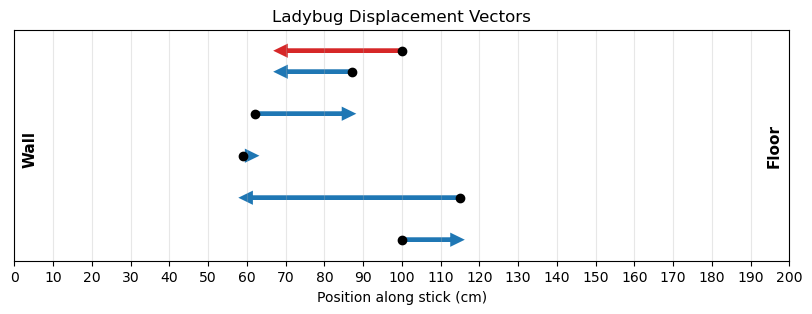

The total displacement is -32 cm, so the final position is 68 cm.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Displacements in cm (positive = toward floor)
D = np.array([15, -56, 3, 25, -19])

# Starting position (cm)
x0 = 100

positions = np.concatenate([[x0], x0 + np.cumsum(D)]) # Cumulative positions
y_offsets = np.linspace(0, 4, len(D)) # Vertical offsets for visual separation

fig, ax = plt.subplots(figsize=(10, 3))

# Draw each displacement as a separate arrow
for i, (dx, y) in enumerate(zip(D, y_offsets)):
    ax.arrow(positions[i], y, dx, 0, length_includes_head=True, head_width=0.18, head_length=2, linewidth=3, color='tab:blue')
    ax.plot(positions[i], y, 'ko', ms=6)
# Draw the resultant vector
ax.arrow(100, 4.5, D.sum(), 0, length_includes_head=True, head_width=0.18, head_length=2, linewidth=3, color='tab:red')
ax.plot(100, 4.5, 'ko', ms=6)
# Label the Floor and Wall
ax.text(196, 1.8, 'Floor', ha='center', rotation=90,fontsize=11,fontweight='bold')
ax.text(4, 1.8, 'Wall', ha='center', rotation=90,fontsize=11,fontweight='bold')

# Formatting
ax.set_xlim(0, 200)
ax.set_ylim(-0.5, 5)
ax.set_yticks([])
ax.set_xticks(np.arange(0,210,10))
ax.set_xlabel('Position along stick (cm)')
ax.set_title('Ladybug Displacement Vectors')
ax.grid(True, axis='x', alpha=0.3)

plt.show()

print(f"The total displacement is {D.sum()} cm, " f"so the final position is {x0 + D.sum()} cm.")

### Algebra of Vectors in 2D

Vectors can be oriented in any direction (i.e., not just parallel or antiparallel).  This complicates their addition, where you **cannot simply add their magnitudes**  to determine the resultant vector.  Instead, we must use geometry to construct the resultant vector and trigonometry to find vector magnitudes and directions.

For a geometric construction of the sum of two vectors in a plane (i.e., 2D), we follow the **parallelogram rule**.  In the figure below, it shows two ways to construct a vector graphically.


```{figure-md} parallelogram-example
<img src="https://openstax.org/apps/image-cdn/v1/f=webp/apps/archive/20251118.192121/resources/aea4d364f6152184d97a3b9c20ff52508b8c61ac" alt="parallelogram example" width="600px">

Image Credit: OpenStax.
```

To add two vectors ($\vec{A} + \vec{B}$ ), we construct a parallelogram by shifting each vector to a parallel copy so that we can trace a path from the origin to the opposite corner of the parallelogram.  The subtraction of two vectors ($\vec{A}-\vec{B}$) is performed in a similar way as shown in the figure below.  However, notice a key difference:

- in our example of vector addition, we had to move at least one vector so we could use the **tail-to-head geometric construction**.
- in our example of vector subtraction, the resultant vector connects the blue dots, not the black dots (i.e., the other cross-piece of the parallelogram).

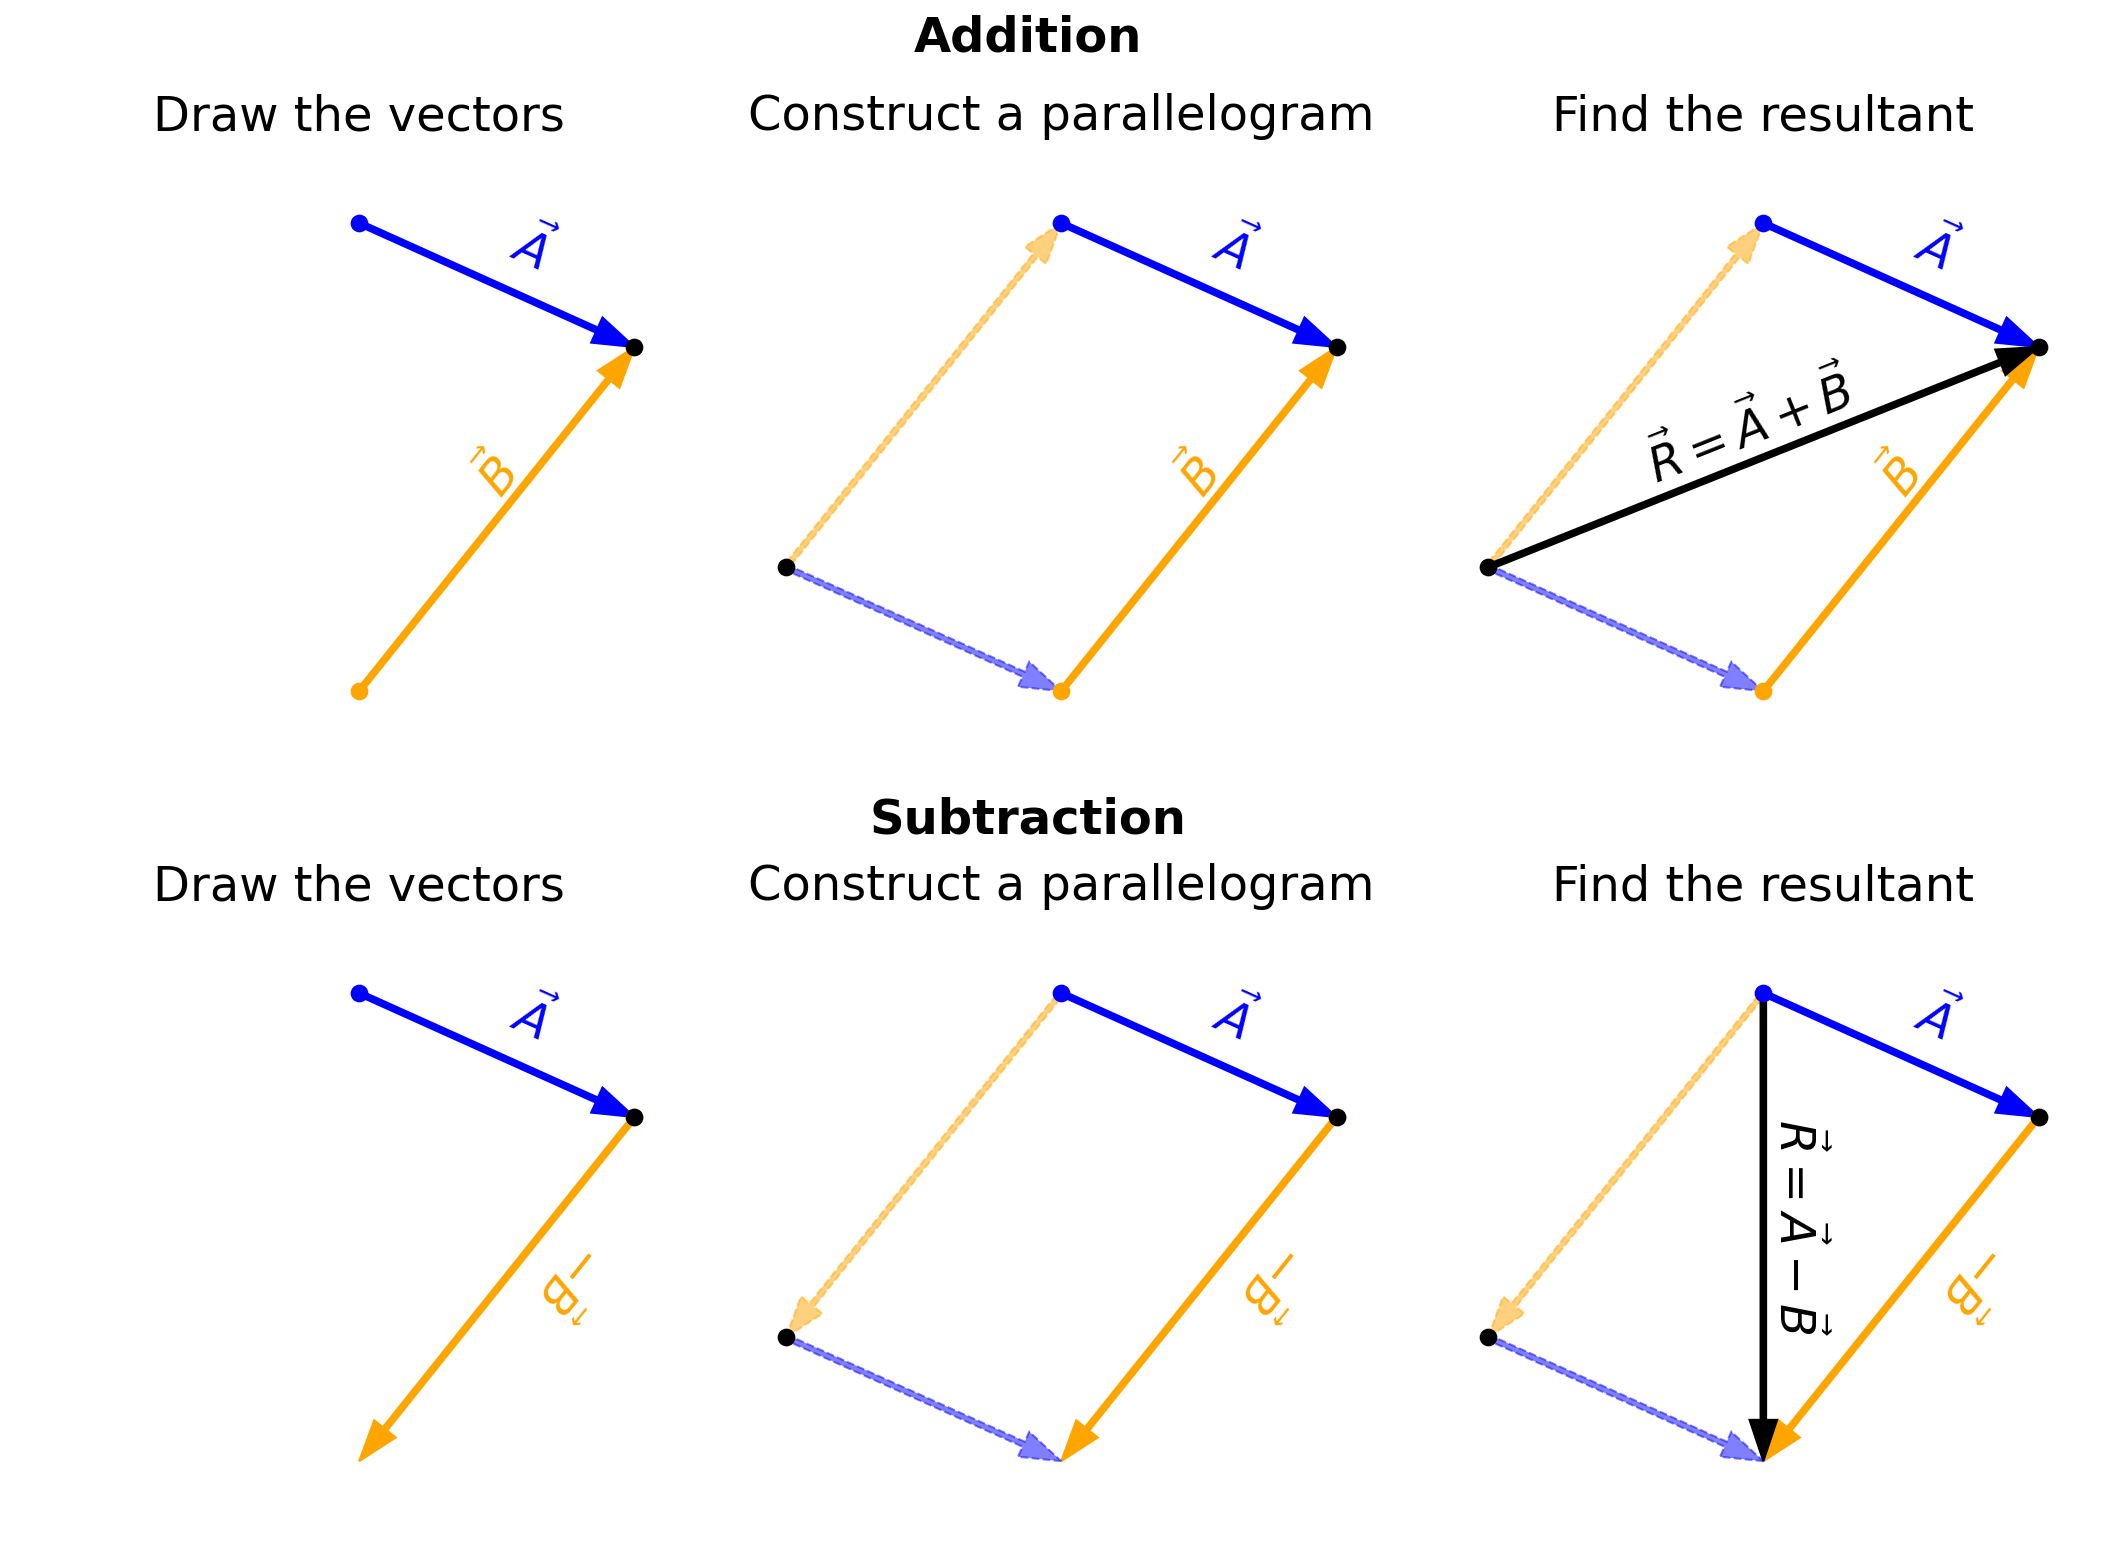

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

rcParams.update({'font.size': 16})

def label_vector(ax, x0, y0, dx, dy, text, color, fontsize, offset=0.10, center=False):
    xm, ym = x0 + dx/2, y0 + dy/2
    nx, ny = -dy, dx
    n = (nx**2 + ny**2)**0.5
    nx, ny = nx/n, ny/n
    angle = np.degrees(np.arctan2(dy, dx))
    if center:
        ax.text(xm + offset*nx, ym + offset*ny,text, color=color, fontsize=fontsize,rotation=angle, ha='center', va='center')
    else:
        ax.text(xm + offset*nx, ym + offset*ny, text, color=color, fontsize=fontsize, rotation=angle)
    return

fs = 'x-large'

fig = plt.figure(figsize=(18,12), dpi=150)
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)

ax_list_add = [ax1,ax2,ax3]
ax_list_sub = [ax4,ax5,ax6]

Ax, Ay = 1.0, -0.45
Bx, By = 1.0,  1.25
aw, hw = 0.02, 0.1
panel_titles = ["Draw the vectors","Construct a parallelogram","Find the resultant"]

for row,(ax_list,op,rowlab) in enumerate([(ax_list_add,'add',"Addition"),(ax_list_sub,'sub',"Subtraction")]):
    xA0, yA0 = 0.0, 0.5
    xMeet, yMeet = xA0+Ax, yA0+Ay
    if op == 'add':
        xB0, yB0 = xMeet-Bx, yMeet-By
        xQ, yQ = xB0-Ax, yB0-Ay
        pts = np.array([[xA0,yA0],[xB0,yB0],[xMeet,yMeet],[xQ,yQ]])
        xmin,xmax = pts[:,0].min(), pts[:,0].max()
        ymin,ymax = pts[:,1].min(), pts[:,1].max()
        dxm,dym = 0.25,0.25
    else:
        Bx_s, By_s = -Bx, -By
        xB0, yB0 = xMeet, yMeet
        xEnd, yEnd = xB0+Bx_s, yB0+By_s
        pts = np.array([[xA0,yA0],[xMeet,yMeet],[xEnd,yEnd],[xA0+Bx_s,yA0+By_s]])
        xmin,xmax = pts[:,0].min(), pts[:,0].max()
        ymin,ymax = pts[:,1].min(), pts[:,1].max()
        dxm,dym = 0.25,0.25
    for i,ax in enumerate(ax_list):
        ax.arrow(xA0,yA0,Ax,Ay,color='b', ls='-', width=aw, length_includes_head=True, head_width=hw)
        label_vector(ax,xA0,yA0,Ax,Ay,r'$\vec{A}$','b',fs,offset=0.06)
        ax.plot(xA0,yA0,'b.',ms=15)
        if op == 'add':
            ax.arrow(xB0,yB0,Bx,By,color='orange', ls='-', width=aw, length_includes_head=True, head_width=hw)
            label_vector(ax,xB0,yB0,Bx,By,r'$\vec{B}$','orange',fs,offset=0.14)
            ax.plot(xB0,yB0,'.',color='orange',ms=15)
            ax.plot(xMeet,yMeet,'k.',ms=15)
            if i > 0:
                ax.arrow(xQ,yQ,Ax,Ay,color='b', ls='--', alpha=0.5, width=aw, length_includes_head=True, head_width=hw)
                ax.arrow(xQ,yQ,Bx,By,color='orange', ls='--', alpha=0.5, width=aw, length_includes_head=True, head_width=hw)
                ax.plot(xQ,yQ,'k.',ms=15)
            if i == 2:
                Rx, Ry = xMeet-xQ, yMeet-yQ
                ax.arrow(xQ,yQ,Rx,Ry,color='k', ls='-', width=aw, length_includes_head=True, head_width=hw)
                label_vector(ax, xQ, yQ, Rx, Ry,r'$\vec{R}=\vec{A}+\vec{B}$','k', fs, offset=0.12, center=True)

        else:
            ax.arrow(xB0,yB0,Bx_s,By_s,color='orange', ls='-', width=aw, length_includes_head=True, head_width=hw)
            label_vector(ax,xB0,yB0,Bx_s,By_s,r'$-\vec{B}$','orange',fs,offset=0.14)
            ax.plot(xB0,yB0,'.',color='orange',ms=15)
            ax.plot(xMeet,yMeet,'k.',ms=15)
            if i > 0:
                ax.arrow(xA0,yA0,Bx_s,By_s,color='orange', ls='--', alpha=0.5, width=aw, length_includes_head=True, head_width=hw)
                ax.arrow(xA0+Bx_s,yA0+By_s,Ax,Ay,color='b', ls='--', alpha=0.5, width=aw, length_includes_head=True, head_width=hw)
                ax.plot(xA0+Bx_s,yA0+By_s,'k.',ms=15)
            if i == 2:
                Rx, Ry = xEnd-xA0, yEnd-yA0
                ax.arrow(xA0,yA0,Rx,Ry,color='k', ls='-', width=aw, length_includes_head=True, head_width=hw)
                label_vector(ax, xA0, yA0, Rx, Ry,r'$\vec{R}=\vec{A}-\vec{B}$','k', fs, offset=0.12, center=True)
        ax.set_aspect('equal')
        ax.set_xlim(xmin-dxm,xmax+dxm)
        ax.set_ylim(ymin-dym,ymax+dym)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_title(panel_titles[i], fontsize=fs, pad=12)
        for spine in ax.spines.values():
            spine.set_visible(False)

fig.text(0.5,0.955,"Addition",ha='center',va='top',fontsize=fs,fontweight='bold')
fig.text(0.5,0.495,"Subtraction",ha='center',va='bottom',fontsize=fs,fontweight='bold')

plt.subplots_adjust(wspace=0.02, hspace=0.25)
plt.show()


The method of tail-to-head geometric construction can be generalized to combined multiple vectors together.  Consider that we have four vectors $\vec{A},\ \vec{B},\ \vec{C},\ \text{and } \vec{D}$ as shown below.

```{figure-md} geometric-construction-example
<img src="https://openstax.org/apps/image-cdn/v1/f=webp/apps/archive/20251118.192121/resources/90ed675f64af59059aa74c026c2675045fac1a43" alt="geometric example" width="600px">

Image Credit: OpenStax.
```


We can select any one of the vectors to start with because **vector addition is commutative and associative**, where the resultant $\vec{R} = \vec{A} + \vec{B} + \vec{C} + \vec{D}$.

Starting with $\vec{D}$, we make a parallel translation of a

- second vector $\vec{A}$ to a position where its "tail" (i.e., origin) coincides with the "head" (i.e., end) of the first vector $\vec{D}$.
- third vector $\vec{C}$ to a position where its origin coincides with the end of the second vector $\vec{A}$. 
- fourth vector $\vec{B}$ to a position where its origin coincides with the end of the third vector $\vec{C}$. 

We draw the resultant vector $\vec{R}$ by connecting the "tail" of the first vector $\vec{D}$ to the "head" of the last vector $\vec{B}$.

#### **Example Problem**: Geometric Construction of the Resultant
````{exercise}
:class: etamu-exercise

**The Problem**

> The three displacement vectors $\vec{A}$, $\vec{B}$, and $\vec{C}$ lie in the horizontal plane.  
> Their magnitudes are $A = 10.0\ \text{cm}$, $B = 7.0\ \text{cm}$, and $C = 8.0\ \text{cm}$, respectively,  
> and their direction angles (measured counterclockwise from the positive $x$-axis) are  
> $\alpha = 35^\circ$, $\beta = -110^\circ$, and $\gamma = 30^\circ$.  
>
> Choose a convenient scale and use a ruler and a protractor to find the following vector sums:
>
> (a) $\vec{R} = \vec{A} + \vec{B}$  
> (b) $\vec{D} = \vec{A} - \vec{B}$  
> (c) $\vec{S} = \vec{A} - 3\vec{B} + \vec{C}$


```{figure-md} geometric-construction-problem
<img src="https://openstax.org/apps/image-cdn/v1/f=webp/apps/archive/20251118.192121/resources/53e6e90c061e0ab600ccb1a95f2b60d389ea9a6f" alt="geometric problem" width="600px">

Image Credit: OpenStax.
```

---

**The Model**

Each displacement is modeled as a two-dimensional vector specified by a **magnitude** and a **direction angle** measured from the positive $x$-axis.

Geometric vector addition is performed by drawing vectors **to scale** using either:

- the **parallelogram rule** for sums and differences of two vectors, or  
- the **tail-to-head method** for combinations involving multiple vectors or scalar multiples.

The resultant vector is drawn from the tail of the first vector to the head of the final vector.

---

**The Math**

The vector sums are determined using **geometric vector addition**.

Each displacement vector is drawn to scale at its specified direction angle, measured counterclockwise from the positive (x)-axis. Vectors are then combined using standard graphical techniques.

For **vector addition**, vectors are placed **tail-to-head**, and the resultant vector is drawn from the tail of the first vector to the head of the last vector.

For **vector subtraction**, the vector being subtracted is first reversed in direction, and the subtraction is treated as vector addition.

Using these methods:

**(a)** The resultant vector ($\vec{R} = \vec{A} + \vec{B}$) is obtained by connecting the tail of $\vec{A}$ to the head of $\vec{B}$.  From the geometric construction,

$$ R \approx 5.8\ \text{cm}, \qquad \theta_R \approx 0^\circ. $$

**(b)** The vector ($\vec{D} = \vec{A} - \vec{B}$) is found by adding $\vec{A}$ to the negative of \vec{B}.  From the construction,

$$ D \approx 16.2\ \text{cm}, \qquad \theta_D \approx 49.3^\circ. $$

**(c)** The vector ($\vec{S} = \vec{A} - 3\vec{B} + \vec{C}$) is found by scaling $\vec{B}, reversing its direction, and adding all vectors sequentially.  From the geometric construction,

$$ S \approx 36.9\ \text{cm}, \qquad \theta_S \approx 52.9^\circ. $$

The magnitude and direction of each resultant vector are measured directly from the scaled diagram using a ruler and protractor.

---

**Conclusion**

Geometric construction allows vector sums and differences to be determined visually when vectors are specified by magnitude and direction.

- The **parallelogram rule** is effective for adding or subtracting two vectors.
- The **tail-to-head method** is preferred for more complicated expressions.
- While the order of addition does not change the result, **drawing vectors accurately to scale is essential**.

---

**The Verification**

The geometric results can be verified computationally by converting each vector into Cartesian components and evaluating the vector sums numerically.
````


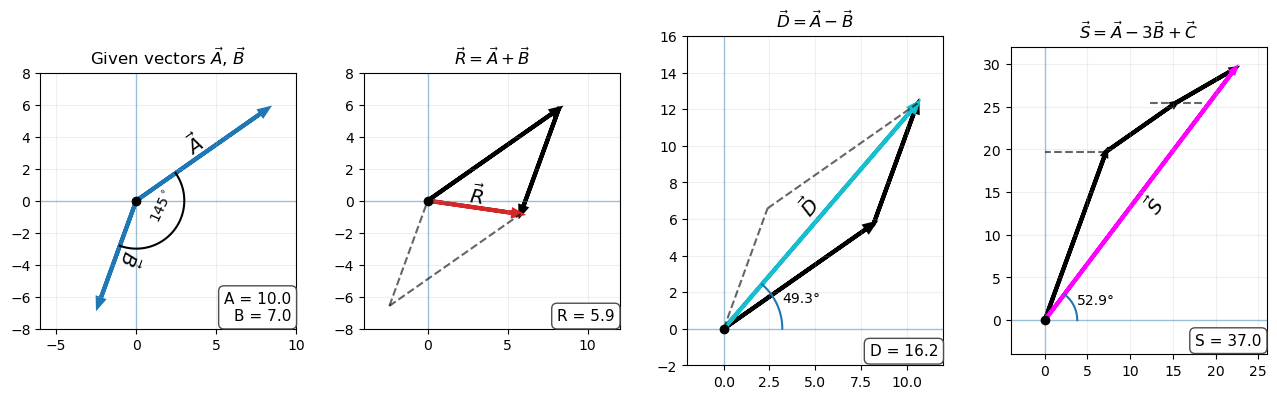

In [98]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------
# Vector setup
# -----------------------
A_mag, B_mag, C_mag = 10.0, 7.0, 8.0
alpha_deg, phi_deg, gamma_deg = 35.0, 145.0, 30.0

A = A_mag * np.array([np.cos(np.deg2rad(alpha_deg)),
                      np.sin(np.deg2rad(alpha_deg))])
B = B_mag * np.array([np.cos(np.deg2rad(alpha_deg - phi_deg)),
                      np.sin(np.deg2rad(alpha_deg - phi_deg))])
C = C_mag * np.array([np.cos(np.deg2rad(gamma_deg)),
                      np.sin(np.deg2rad(gamma_deg))])

R = A + B
D = A - B
S = A - 3*B + C

# -----------------------
# Helpers
# -----------------------
def draw_arrow(ax, origin, v, **kw):
    ax.arrow(*origin, *v, length_includes_head=True, head_width=0.35, head_length=0.45, linewidth=3, **kw)

def info_box(ax, lines, loc="lower right"):
    locs = {
        "upper left":  (0.02, 0.98, "left",  "top"),
        "upper right": (0.98, 0.98, "right", "top"),
        "lower left":  (0.02, 0.02, "left",  "bottom"),
        "lower right": (0.98, 0.02, "right", "bottom"),
    }
    x, y, ha, va = locs[loc]
    ax.text(x, y, "\n".join(lines), transform=ax.transAxes, ha=ha, va=va, fontsize=11,
            bbox=dict(boxstyle="round,pad=0.35", facecolor="white", edgecolor="0.3"))

def setup_axes(ax):
    ax.set_aspect("equal", adjustable="box")
    ax.axhline(0, lw=1, alpha=0.4)
    ax.axvline(0, lw=1, alpha=0.4)
    ax.grid(True, alpha=0.2)
    ax.plot(0, 0, "ko", ms=6)

def label_vector(ax, x0, y0, dx, dy, text, color, fontsize, offset=0.10, center=False):
    xm, ym = x0 + dx/2, y0 + dy/2
    nx, ny = -dy, dx
    n = (nx**2 + ny**2)**0.5
    nx, ny = nx/n, ny/n
    angle = np.degrees(np.arctan2(dy, dx))
    if center:
        ax.text(xm + offset*nx, ym + offset*ny,text, color=color, fontsize=fontsize,rotation=angle, ha='center', va='center')
    else:
        ax.text(xm + offset*nx, ym + offset*ny, text, color=color, fontsize=fontsize, rotation=angle)
    return

# -----------------------
# Panel draw functions
# -----------------------
def panel_given(ax):
    draw_arrow(ax, (0,0), A, color="tab:blue")
    draw_arrow(ax, (0,0), B, color="tab:blue")

    label_vector(ax,0,0,A[0],A[1], r"$\vec A$",'k',fs,0.8,True)
    label_vector(ax,0,0,B[0],B[1], r"$\vec B$",'k',fs,0.8,True)
    
    # included angle
    t = np.linspace(np.deg2rad(alpha_deg), np.deg2rad(alpha_deg - phi_deg), 80)
    r = 3
    ax.plot(r*np.cos(t), r*np.sin(t),'k')
    ax.text(0.7*r*np.cos(t[len(t)//2]), 0.7*r*np.sin(t[len(t)//2]), "$145^\circ$",rotation=65,horizontalalignment='center')

    info_box(ax, ["A = 10.0", "B = 7.0"])
    ax.set_xlim(-6, 10)
    ax.set_ylim(-8, 8)

def panel_sum(ax):
    draw_arrow(ax, (0,0), A, color="k")
    draw_arrow(ax, A, B, color="k")
    draw_arrow(ax, (0,0), R, color="tab:red")

    ax.plot([B[0], R[0]], [B[1], R[1]], "k--", alpha=0.6)
    ax.plot([B[0], 0], [B[1], 0], "k--", alpha=0.6)

    label_vector(ax,0,0,R[0],R[1], r"$\vec R$",'k',fs,0.8,True)
    info_box(ax, [f"R = {np.linalg.norm(R):.1f}"])
    ax.set_xlim(-4, 12)
    ax.set_ylim(-8, 8)

def panel_diff(ax):
    draw_arrow(ax, (0,0), A, color="k")
    draw_arrow(ax, A, -B, color="k")
    draw_arrow(ax, (0,0), D, color="tab:cyan")

    ax.plot([-B[0], D[0]], [-B[1], D[1]], "k--", alpha=0.6)
    ax.plot([0, -B[0]], [0, -B[1]], "k--", alpha=0.6)

    theta = np.arctan2(D[1], D[0])
    t = np.linspace(0, theta, 80)
    r = 3.2
    ax.plot(r*np.cos(t), r*np.sin(t))
    ax.text(1.1*r*np.cos(theta/2), 1.1*r*np.sin(theta/2), f"{np.degrees(theta):.1f}°")

    label_vector(ax,0,0,D[0],D[1], r"$\vec D$",'k',fs,0.8,True)
    info_box(ax, [f"D = {np.linalg.norm(D):.1f}"])
    ax.set_xlim(-2, 12)
    ax.set_ylim(-2, 16)

def panel_S(ax):
    # Head-to-tail: -3B then A then C
    draw_arrow(ax, (0,0), -3*B, color="k")
    draw_arrow(ax, -3*B, A, color="k")
    draw_arrow(ax, -3*B + A, C, color="k")

    # Resultant S = A - 3B + C
    draw_arrow(ax, (0,0), S, color="magenta")

    # Construction guides (optional, light)
    ax.plot([-3*B[0], 0], [-3*B[1], -3*B[1]], "k--", alpha=0.6)
    ax.plot([0.8*(-3*B + A)[0],1.2*(-3*B + A)[0]], [(-3*B + A)[1], (-3*B + A)[1]], "k--", alpha=0.6)
    # Angle marker for S
    theta = np.arctan2(S[1], S[0])
    t = np.linspace(0, theta, 80)
    r = 3.8
    ax.plot(r*np.cos(t), r*np.sin(t))
    ax.text(1.1*r*np.cos(theta/2), 1.1*r*np.sin(theta/2), f"{np.degrees(theta):.1f}°")
    # Optional vector symbol labels (kept minimal)
    label_vector(ax,0,0,S[0],S[1], r"$\vec S$",'k',fs,-2.2,True)
    # Boxed magnitude label
    info_box(ax, [f"S = {np.linalg.norm(S):.1f}"])
    ax.set_xlim(-4, 26)
    ax.set_ylim(-4, 32)

# -----------------------
# Loop over panels
# -----------------------
fig, axes = plt.subplots(1, 4, figsize=(13, 4))

panels = [("Given vectors "+r"$\vec{A}$, $\vec{B}$", panel_given),
    (r"$\vec R=\vec A+\vec B$", panel_sum),
    (r"$\vec D=\vec A-\vec B$", panel_diff),
    (r"$\vec S=\vec A-3\vec B+\vec C$", panel_S),]

for ax, (title, draw_fn) in zip(axes, panels):
    setup_axes(ax)
    ax.set_title(title)
    draw_fn(ax)

plt.tight_layout()
plt.show()


## Coordinate Systems and Vector Components

The graphic method of vector addition can be time-consuming, where we can instead describe a vector in terms its components within a coordinate system.  In a rectangular (**Cartesian**) $xy$-coordinate system in a plane, a point is described by a pair of coordinates $(x,\ y)$ that "locate" the point.  *Note we used this on the chessboard using letters and numbers for each cell.*

### Vector components
A vector $\vec{A}$ can be decomposed into its **vector components**, where each component is itself a vector.  These vector components are constructed using the **unit vectors** $\hat{i}$ and $\hat{j}$ that mark a unit step in either the $x$ or $y$-axis, respectively.  Therefore, the vector $\vec{A}$ can be represented as

\begin{align}
\vec{A} &= \vec{A}_x + \vec{A}_y,\\
&= A_x\hat{i} + A_y\hat{j},
\end{align}

where the $A_x$ and $A_y$ represent the magnitude of the step along the respective Cartesian axis.  Recall the chessboard where the start of the vector can be anywhere on the board.  This means that the **component magnitudes** are measurements relative to where you start.

Let's define the starting location of vector $\vec{A}$ as a point $(x_o,\ y_o)$, and the vector terminates at a point $(x,\ y)$.  Then, we can describe the vector as

\begin{align}
\vec{A} &= \vec{A}_x + \vec{A}_y, \\
&= (x-x_o)\hat{i} + (y-y_o)\hat{j}.
\end{align}

```{note}
When referring to $x_o$, it is read as "x-naught".  The word [naught](https://en.wikipedia.org/wiki/Names_for_the_number_0_in_English) is more commonly used in British English referring to the number zero so that one can delineate between the number zero and the letter o.
```

#### **Example Problem**: Mouse pointer displacement
```{exercise}
:class: etamu-exercise

**The Problem**

> A mouse pointer on the display monitor of a computer at its initial position is at point $(6.0\ \text{cm},\,1.6\ \text{cm})$ with respect to the lower left-side corner. If you move the pointer to an icon located at point $(2.0\ \text{cm},\,4.5\ \text{cm})$, what is the displacement vector of the pointer?

---

**The Model**

We model the screen as a two-dimensional Cartesian coordinate system with the origin at the lower left corner of the monitor. The positive $x$-direction points to the right, and the positive $y$-direction points upward.

The displacement vector $\vec{D}$ is defined as the vector pointing from the **initial position** of the pointer to its **final position**. Its components are obtained by subtracting the initial coordinates from the final coordinates.

---

**The Math**

Let the initial and final points point be

\begin{align*}
(x_i, y_i) &= (6.0,\ 1.6)\ \text{cm}, \\
&\text{and} \\
(x_f, y_f) &= (2.0,\ 4.5)\ \text{cm}.
\end{align*}

The components of the displacement vector are

\begin{align*}
D_x &= x_f - x_i = 2.0 - 6.0 = -4.0\ \text{cm}, \\ 
D_y &= y_f - y_i = 4.5 - 1.6 = +2.9\ \text{cm}.
\end{align*}

Therefore, the displacement vector in unit-vector form is

\begin{align*}
\vec{D} &= D_x \hat{i} + D_y \hat{j}, \\
&= (-4.0 \hat{i} + 2.9 \hat{j})\ \text{cm}.
\end{align*}

---

**Conclusion**

The mouse pointer is displaced **4.0 cm to the left** and **2.9 cm upward** from its initial position. The displacement vector points into the second quadrant, reflecting a negative $x$-component and a positive $y$-component.

---

**The Verification**

We verify the displacement visually by drawing the component vectors and the resultant displacement vector using Python.
```


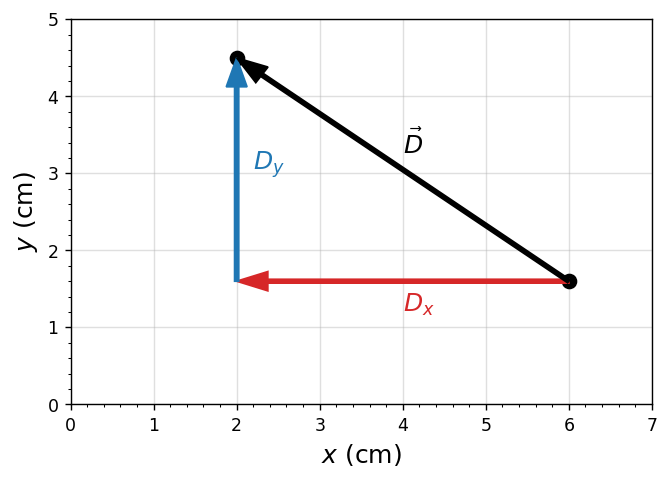

The displacement vector is D = (-4.0 î + 2.9 ĵ) cm.


In [6]:
import matplotlib.pyplot as plt
import numpy as np

fs = 'x-large'

# Initial and final positions (cm)
xi, yi = 6.0, 1.6
xf, yf = 2.0, 4.5

# Displacement components
Dx = xf - xi
Dy = yf - yi

fig = plt.figure(figsize=(6, 4),dpi=125)
ax = fig.add_subplot(111)
ax.grid(True, zorder=2, alpha=0.4)

# x-component
ax.arrow(xi, yi, Dx, 0, color='tab:red', width=0.05, length_includes_head=True, head_width=0.25, zorder=4)
ax.text(xi + Dx/2, yi - 0.4, r'$D_x$', fontsize=fs, color='tab:red')

# y-component
ax.arrow(xi + Dx, yi, 0, Dy, color='tab:blue', width=0.05, length_includes_head=True, head_width=0.25, zorder=4)
ax.text(xi + Dx + 0.2, yi + Dy/2, r'$D_y$', fontsize=fs, color='tab:blue')

# resultant displacement
ax.arrow(xi, yi, Dx, Dy, color='k', width=0.05, length_includes_head=True, head_width=0.25, zorder=5)
ax.text(xi + Dx/2, yi + Dy/2 + 0.2, r'$\vec{D}$', fontsize=fs)

# points
ax.plot(xi, yi, 'ko', ms=8)
ax.plot(xf, yf, 'ko', ms=8)

ax.set_xlim(0, 7)
ax.set_ylim(0, 5)
ax.set_xlabel('$x$ (cm)', fontsize=fs)
ax.set_ylabel('$y$ (cm)', fontsize=fs)
ax.minorticks_on()

plt.show()

print(f"The displacement vector is D = ({Dx:.1f} î + {Dy:.1f} ĵ) cm.")




### Determining vector magnitude and direction 
The **vector magnitude** in 2D is also described as the [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) and occasionally called the Pythagorean distance.  The distance along the vector $\vec{A}$ is determined by summing the squares along the components to get $A^2$ and taking the square root to get the magnitude $A$.  

- The square root permits positive and negative results, where we take the absolute magnitude.  The direction will be resolve by the **direction angle** $\theta_A$.

```{figure-md} direction-angle-example
<img src="https://openstax.org/apps/image-cdn/v1/f=webp/apps/archive/20251118.192121/resources/eb970e1cd57a07708af29926fa26b13130a5b9d9" alt="direction angle" width="600px">

Image Credit: OpenStax.
```

From the Euclidean distance formula (or Pythagorean theorem), we have

\begin{align}
|A| &= \sqrt{(x-x_o)^2 + (y-y_o)^2},\\
&= \sqrt{A_x^2 + A_y^2}.
\end{align}

This equation works even when the components ($A_x,\ A_y$) are negative.  The direction angle of a vector is determined using a [trigonometric function](https://en.wikipedia.org/wiki/Trigonometric_functions#Right-angled_triangle_definitions).  See the triangle below and the summary of the trig functions.  Various [mnemonics](https://en.wikipedia.org/wiki/Mnemonics_in_trigonometry) are used to help remember these relations (e.g., SOH-CAH-TOA).




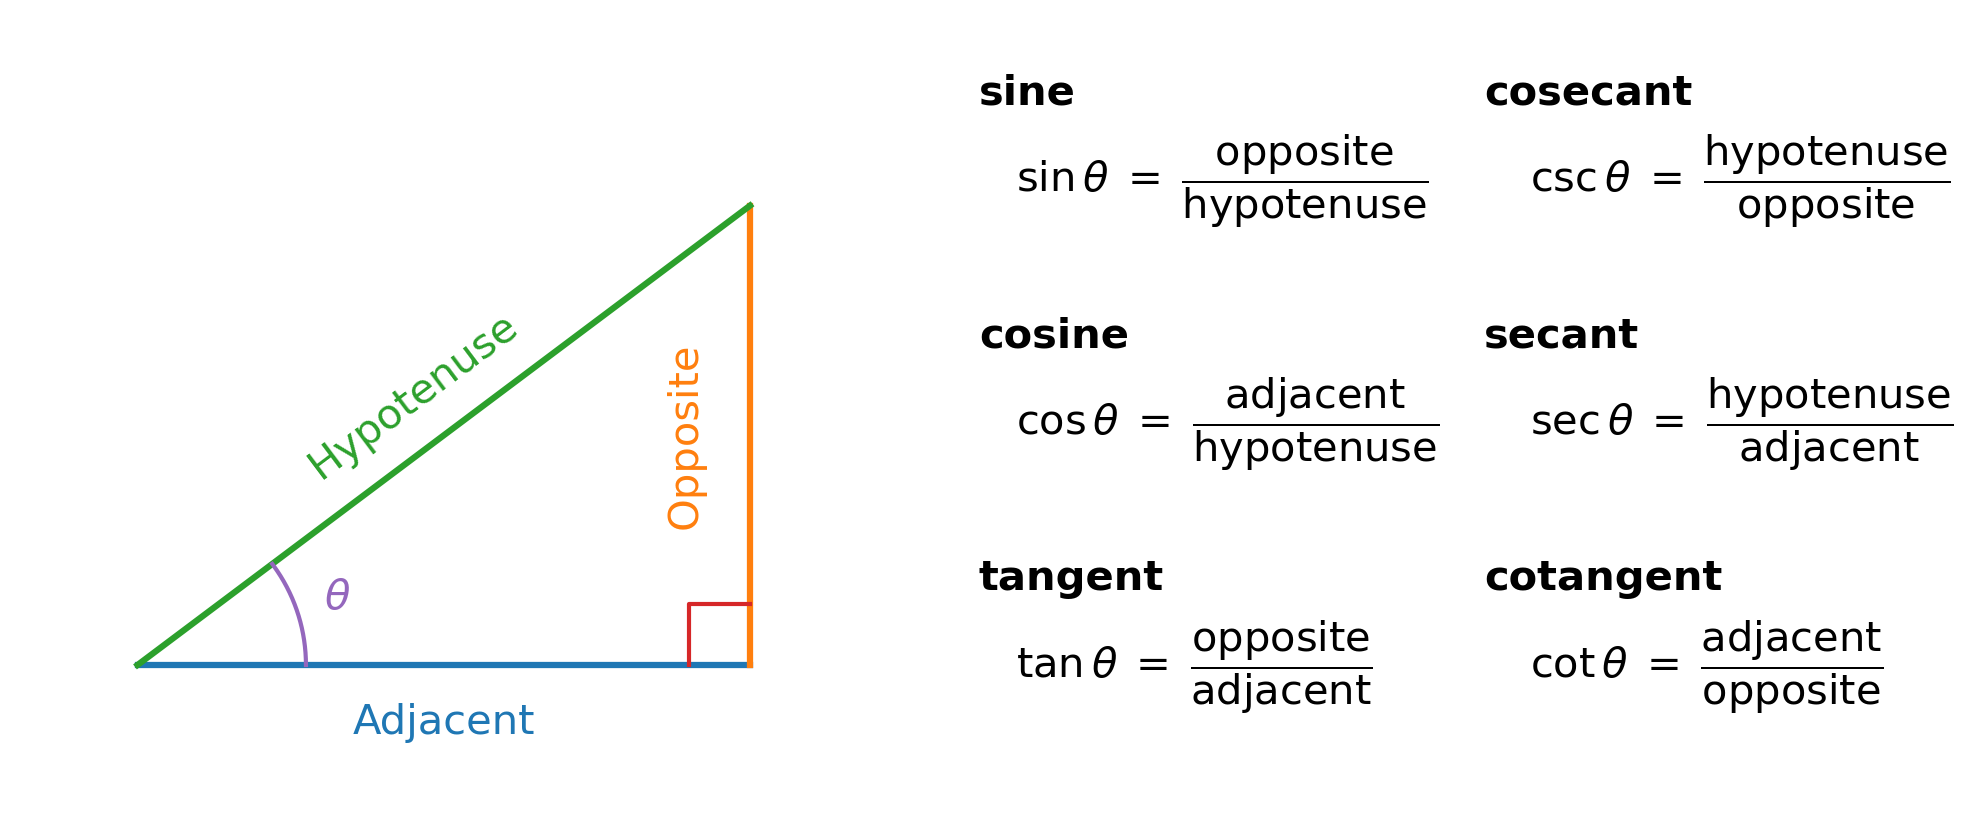

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams.update({'font.size': 20})

fig = plt.figure(figsize=(14,6), dpi=150)
axL = fig.add_subplot(121)
axR = fig.add_subplot(122)

# -------------------------
# LEFT: Right triangle
# -------------------------
A = np.array([0.0, 0.0])
B = np.array([4.0, 0.0])
C = np.array([4.0, 3.0])

c_adj = '#1f77b4'   # blue
c_opp = '#ff7f0e'   # orange
c_hyp = '#2ca02c'   # green
c_theta = '#9467bd' # purple
c_right = '#d62728' # red

axL.plot([A[0], B[0]], [A[1], B[1]], lw=3, color=c_adj)
axL.plot([B[0], C[0]], [B[1], C[1]], lw=3, color=c_opp)
axL.plot([A[0], C[0]], [A[1], C[1]], lw=3, color=c_hyp)

s = 0.4
axL.plot([B[0]-s, B[0]-s, B[0]], [B[1], B[1]+s, B[1]+s], lw=2, color=c_right)

def unit(v):
    n = (v[0]**2 + v[1]**2)**0.5
    return v/n

def label_side(ax, P, Q, text, color, offset=0.30, rotate=True):
    mid = 0.5*(P+Q)
    v = Q-P
    u = unit(v)
    n = np.array([-u[1], u[0]])
    ang = np.degrees(np.arctan2(v[1], v[0]))
    ax.text(mid[0]+offset*n[0], mid[1]+offset*n[1], text,
            color=color, rotation=ang if rotate else 0,
            ha='center', va='center')

# Tighten Adjacent/Opposite offsets
label_side(axL, A, B, "Adjacent", c_adj, offset=-0.38, rotate=False)
label_side(axL, B, C, "Opposite", c_opp, offset=0.42, rotate=True)
label_side(axL, A, C, "Hypotenuse", c_hyp, offset=0.32, rotate=True)

# Theta arc at A: more room
theta = np.arctan2(C[1]-A[1], C[0]-A[0])
r = 1.10
t = np.linspace(0, theta, 140)
axL.plot(A[0] + r*np.cos(t), A[1] + r*np.sin(t), lw=2, color=c_theta)
axL.text(A[0] + 1.25*r*np.cos(theta/2),
         A[1] + 1.25*r*np.sin(theta/2),
         r'$\theta$', color=c_theta, ha='center', va='center')

axL.set_aspect('equal')
axL.set_xlim(-0.8, 5.2)
axL.set_ylim(-1.0, 4.2)
axL.set_xticks([])
axL.set_yticks([])
for spine in axL.spines.values():
    spine.set_visible(False)

# -------------------------
# RIGHT: Trig definitions (aligned grid)
# -------------------------
axR.axis('off')

# Column anchors
x_name_L = 0.0
x_eq_L   = 0.04
x_name_R = 0.55
x_eq_R   = 0.6

# Row anchors
y1, y2, y3 = 0.78, 0.48, 0.18
dy_title = 0.11

# Left column
axR.text(x_name_L, y1+dy_title, "sine", fontweight='bold', transform=axR.transAxes, ha='left')
axR.text(x_eq_L,   y1, r'$\sin\theta \;=\; \dfrac{\mathrm{opposite}}{\mathrm{hypotenuse}}$',
         transform=axR.transAxes, ha='left')

axR.text(x_name_L, y2+dy_title, "cosine", fontweight='bold', transform=axR.transAxes, ha='left')
axR.text(x_eq_L,   y2, r'$\cos\theta \;=\; \dfrac{\mathrm{adjacent}}{\mathrm{hypotenuse}}$',
         transform=axR.transAxes, ha='left')

axR.text(x_name_L, y3+dy_title, "tangent", fontweight='bold', transform=axR.transAxes, ha='left')
axR.text(x_eq_L,   y3, r'$\tan\theta \;=\; \dfrac{\mathrm{opposite}}{\mathrm{adjacent}}$',
         transform=axR.transAxes, ha='left')

# Right column
axR.text(x_name_R, y1+dy_title, "cosecant", fontweight='bold', transform=axR.transAxes, ha='left')
axR.text(x_eq_R,   y1, r'$\csc\theta \;=\; \dfrac{\mathrm{hypotenuse}}{\mathrm{opposite}}$',
         transform=axR.transAxes, ha='left')

axR.text(x_name_R, y2+dy_title, "secant", fontweight='bold', transform=axR.transAxes, ha='left')
axR.text(x_eq_R,   y2, r'$\sec\theta \;=\; \dfrac{\mathrm{hypotenuse}}{\mathrm{adjacent}}$',
         transform=axR.transAxes, ha='left')

axR.text(x_name_R, y3+dy_title, "cotangent", fontweight='bold', transform=axR.transAxes, ha='left')
axR.text(x_eq_R,   y3, r'$\cot\theta \;=\; \dfrac{\mathrm{adjacent}}{\mathrm{opposite}}$',
         transform=axR.transAxes, ha='left')

plt.tight_layout()
plt.show()


Since we have the lengths of both the adjacent ($A_x$) and opposite ($A_y$) sides of the triangle, it is easiest to use the $\tan{\theta}$ function, which results in

\begin{align}
\tan{\theta} = \frac{A_y}{A_x}.
\end{align}

If $\vec{A}$ lies in quadrants I or IV, the angle $\theta = \theta_A$,
but it is measured in the

- *counterclockwise* direction in quadrant I, 
- *clockwise* direction (negative) in quadrant IV

relative to the $x$-axis.

To find $\theta_A$ in quadrants II or III, one must use the relation $\theta_A = 180^\circ + \theta$ because $\theta<0$ due to $A_y/A_x < 0$. 

```{figure-md} quadrant-example
<img src="https://openstax.org/apps/image-cdn/v1/f=webp/apps/archive/20251118.192121/resources/6e4ad23b01d9e5a0e71a1771bd115eb0c27a0af8" alt="direction angle" width="600px">

Image Credit: OpenStax.
```

#### **Example Problem**: Mouse pointer magnitude and direction
````{exercise}
:class: etamu-exercise

**The Problem**

> You move a mouse pointer on the display monitor from its initial position at point $(6.0\ \text{cm},\, 1.6\ \text{cm})$ to an icon located at point $(2.0\ \text{cm},\, 4.5\ \text{cm})$. What are the magnitude and direction of the displacement vector of the pointer?

---

**The Model**

We model the screen as a two-dimensional Cartesian coordinate system with the origin at the lower left corner of the monitor. The positive $x$-direction points to the right, and the positive $y$-direction points upward.

The displacement vector $\vec{D}$ points from the initial position to the final position. Its components are found by subtraction:

$$ D_x = x_f - x_i,\qquad D_y = y_f - y_i.$$

---

**The Math**

Let the initial and final points be

\begin{align*}
(x_i, y_i) &= (6.0,\ 1.6)\ \text{cm}, \\
(x_f, y_f) &= (2.0,\ 4.5)\ \text{cm}.
\end{align*}

The displacement components are

\begin{align*}
D_x &= x_f - x_i = 2.0 - 6.0 = -4.0\ \text{cm}, \\
D_y &= y_f - y_i = 4.5 - 1.6 = +2.9\ \text{cm}.
\end{align*}

**Magnitude**

\begin{align*}
D &= \sqrt{D_x^2 + D_y^2} \\
&= \sqrt{(-4.0)^2 + (2.9)^2}\ \text{cm} \\
&= \sqrt{16.0 + 8.41}\ \text{cm} \\
&= \sqrt{24.41}\ \text{cm} \\
&= 4.9\ \text{cm}.
\end{align*}

**Direction**

First compute the reference angle using the ratio of components:

\begin{align*}
\tan\theta &= \frac{D_y}{D_x} = \frac{+2.9}{-4.0} = -0.725, \\
\theta &= \tan^{-1}(-0.725) = -35.9^\circ.
\end{align*}

Because $D_x<0$ and $D_y>0$, the vector lies in Quadrant II. Therefore the direction angle measured counterclockwise from $+x$ is

\begin{align*}
\theta_D &= \theta + 180^\circ \\
&= -35.9^\circ + 180^\circ \\
&= 144.1^\circ.
\end{align*}


```{admonition} Common Mistake
:class: warning, dropdown

A very common mistake when finding the direction of a displacement vector is to compute

$$\theta = \tan^{-1} \left(\frac{D_y}{D_x}\right)$$

and **stop there**.

This inverse tangent only returns angles between $-90^\circ$ and $+90^\circ$. It does **not** know which quadrant the vector lies in.

***What can go wrong***

* If $D_x < 0$, the vector is in Quadrant II or III.
* If $D_y < 0$, the vector is in Quadrant III or IV.
* The raw $\tan^{-1}$ value must often be **adjusted by $180^\circ$**.

In this problem:

$$ D_x = -4.0,\qquad D_y = +2.9 $$

so the displacement vector lies in **Quadrant II**, not Quadrant IV.
Failing to account for this would give the wrong direction angle.

**Best practice**

* **Always check the signs of $D_x$ and $D_y$.**
* Or, when using Python, use `np.arctan2(Dy, Dx)`, which automatically returns the correct quadrant.

$$ \theta = \tan^{-1}\left(\frac{D_y}{D_x}\right) \quad \textbf{must never be used blindly.} $$

```

---
**Conclusion**

The displacement vector has magnitude $D = 4.9\ \text{cm}$ and direction $\theta_D = 144.1^\circ$ (counterclockwise from the positive $x$-axis). It points into Quadrant II, consistent with $D_x=-4.0\ \text{cm}$ and $D_y=+2.9\ \text{cm}$.

---

**The Verification**

We verify the components, magnitude, and direction visually by drawing $\vec{D}$ and its component vectors using Python.
````


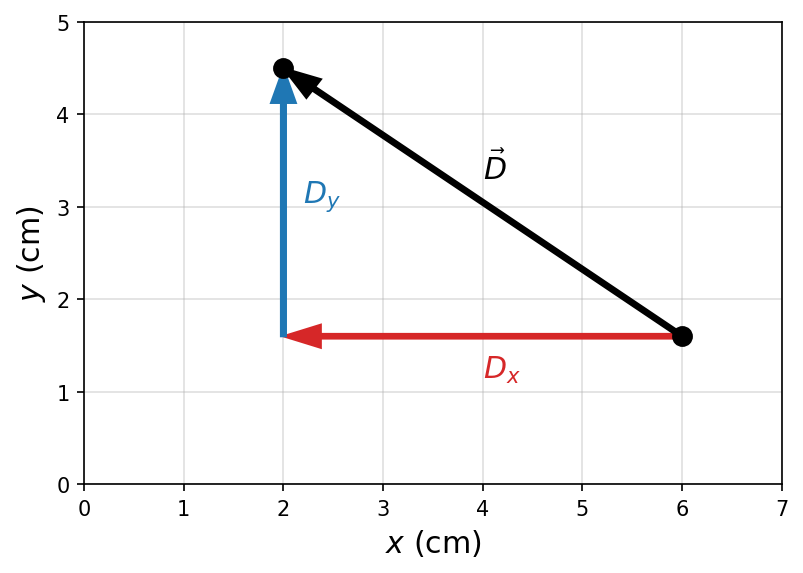

The displacement has magnitude D = 4.9 cm and direction θ = 144.1° (CCW from +x).


In [7]:
import matplotlib.pyplot as plt
import numpy as np

fs = 'x-large'

# Given points (cm)
xi, yi = 6.0, 1.6
xf, yf = 2.0, 4.5

# Components
Dx, Dy = xf - xi, yf - yi

# Magnitude and direction (CCW from +x)
D = np.hypot(Dx, Dy)
theta = np.degrees(np.arctan2(Dy, Dx))  # already quadrant-correct

fig = plt.figure(figsize=(6, 4), dpi=125)
ax = fig.add_subplot(111)
ax.grid(True, zorder=2, alpha=0.4)

# Component arrows (single-line arrow calls)
ax.arrow(xi, yi, Dx, 0, color='tab:red',  ls='-', width=0.05, length_includes_head=True, head_width=0.25, zorder=4)
ax.arrow(xi + Dx, yi, 0, Dy, color='tab:blue', ls='-', width=0.05, length_includes_head=True, head_width=0.25, zorder=4)
# Resultant displacement arrow
ax.arrow(xi, yi, Dx, Dy, color='k', ls='-', width=0.05, length_includes_head=True, head_width=0.25, zorder=5)
# Points
ax.plot(xi, yi, 'k.', ms=18, zorder=6)
ax.plot(xf, yf, 'k.', ms=18, zorder=6)

# Labels
ax.text(xi + Dx/2, yi - 0.45, r'$D_x$', fontsize=fs, color='tab:red')
ax.text(xi + Dx + 0.20, yi + Dy/2, r'$D_y$', fontsize=fs, color='tab:blue')
ax.text(xi + Dx/2, yi + Dy/2 + 0.25, r'$\vec{D}$', fontsize=fs, color='k')

ax.set_xlim(0, 7)
ax.set_ylim(0, 5)
ax.set_xlabel('$x$ (cm)', fontsize=fs)
ax.set_ylabel('$y$ (cm)', fontsize=fs)

plt.show()

print(f"The displacement has magnitude D = {D:.1f} cm and direction θ = {theta:.1f}° (CCW from +x).")


### Polar coordinates

To locate a point on a plane, we need two orthogonal directions.  In the Cartesian coordinate system, we used the unit vectors $\hat{i}$ and $\hat{j}$.  When considering rotating objects, it can be easier working in the **[polar coordinate system](https://en.wikipedia.org/wiki/Polar_coordinate_system)**.

The location of a point is instead defined by the **radial coordinate** $r$ (i.e., distance from the origin) and **angular coordinate** $\varphi$ (sometimes called the azimuthal coordinate) which measures the rotation angle with some chosen direction, usually the positive $x$-direction.  *The angular coordinate is often measured in radians.*

The unit vectors for polar coordinates are given as $\hat{r}$ (radial) and $\hat{t}$ (transverse).  The $\hat{r}$ describes points outward in radius relative to the center.  The positive $\hat{t}$ direction indicates how the angle $\varphi$ changes in the *counterclockwise* direction.

We can connect a the Cartesian point to a polar equivalent via a transformation:

\begin{align}
x &= r\cos{\varphi}, \\
y &= r\sin{\varphi}.
\end{align}

See the figure below, which shows the relationsip between Cartesian and polar coordinates.

```{figure-md} polar-example
<img src="https://openstax.org/apps/image-cdn/v1/f=webp/apps/archive/20251118.192121/resources/d52e90433c55249e42bad2bef3e25ba3f750d7f6" alt="polar coords" width="600px">

Image Credit: OpenStax.
```




#### **Example Problem**: Coins near a well
```{exercise}
:class: etamu-exercise

**The Problem**

> A treasure hunter finds one silver coin at a location $20.0$ m away from a dry well in the direction $20^\circ$ north of east and finds one gold coin at a location $10.0$ m away from the well in the direction $20^\circ$ north of west. What are the polar and rectangular coordinates of these findings with respect to the well?

---

**The Model**

We treat the dry well as the origin of a two-dimensional Cartesian coordinate system. By convention, the positive $x$-axis points **east** and the positive $y$-axis points **north**. With this choice, any location in the plane can be described either by its distance and direction from the origin (polar coordinates) or by its horizontal and vertical displacements (rectangular coordinates).

Each coin is naturally described in polar form because its distance from the well and its direction are given directly. To compare the locations using standard vector components, we convert these polar descriptions into rectangular coordinates using the relations

\begin{align*}
x &= r\cos\theta, \\
y &= r\sin\theta.
\end{align*}

All angles are measured counterclockwise from the positive $x$-axis.

---

**The Math**

For the **silver coin**, the given description places it $20.0$ m from the well at an angle of $20^\circ$ north of east. In polar form, this corresponds to

\begin{align*}
r_S &= 20.0\ \text{m}, \\
\theta_S &= 20^\circ = \frac{\pi}{9}.
\end{align*}

Substituting these values into the coordinate relations gives
\begin{align*}
x_S &= (20.0)\cos\!\left(\frac{\pi}{9}\right) = 18.9\ \text{m}, \\
y_S &= (20.0)\sin\!\left(\frac{\pi}{9}\right) = 6.8\ \text{m}.
\end{align*}

The **gold coin** is located $20^\circ$ north of west. Because west corresponds to $180^\circ$ measured from the positive $x$-axis, the direction angle for this coin is

\begin{align*}
r_G &= 10.0\ \text{m}, \\
\theta_G &= 180^\circ - 20^\circ = 160^\circ = \frac{8\pi}{9}.
\end{align*}

Using the same coordinate relations,

\begin{align*}
x_G &= (10.0)\cos\left(\frac{8\pi}{9}\right) = -9.4\ \text{m}, \\
y_G &= (10.0)\sin\left(\frac{8\pi}{9}\right) = 3.4\ \text{m}.
\end{align*}

---

**The Conclusion**

The silver coin is located at $(x_S, y_S) = (18.9\ \text{m},\ 6.8\ \text{m}),$ 
placing it east and north of the well. The gold coin is located at $(x_G, y_G) = (-9.4\ \text{m},\ 3.4\ \text{m}),$ which places it west and north of the well.

The signs of the $x$-components correctly encode the physical directions: positive for eastward displacement and negative for westward displacement, while both coins have positive $y$-components because they lie north of the well.

---

**The Verification**

We can confirm these coordinate conversions numerically by evaluating the trigonometric expressions directly using Python, which also helps reinforce the connection between the mathematical model and a computational implementation.

```


In [ ]:
import numpy as np

# Angles in radians
theta_s = np.pi/9
theta_g = 8*np.pi/9

# Radii
r_s = 20.0
r_g = 10.0

# Cartesian coordinates
x_s, y_s = r_s*np.cos(theta_s), r_s*np.sin(theta_s)
x_g, y_g = r_g*np.cos(theta_g), r_g*np.sin(theta_g)

print(f"Silver coin: (x, y) = ({x_s:.1f}, {y_s:.1f}) m")
print(f"Gold coin:   (x, y) = ({x_g:.1f}, {y_g:.1f}) m")

### Vectors in 3D

To specify a location in space (in general), we need three coordinates ($x,\ y,\ z$), where two coordinates ($x,\ y$) can identify points in a plane, and the $z$-coordinate locates points that extend *above or below* the plane.  The advent of an extra coordinate necessitates the inclusion of a third unit vector $\hat{k}$.

The order of the coordinates $x-y-z$ and the unit vectors $\hat{i}-\hat{j}-\hat{k}$ defines the standard **right-handed coordinate system**.  In this coordinate system, "up" is now defined using the $+\hat{z}$ direction and aligns with your right thumb.  That means the positive azimuthal (polar) angle uses the $x$-axis as a reference direction and rotates *counterclockwise* (from $\hat{i}$ to $\hat{j}$), which follows the curve of your fingers as you curl them.  The figure below illustrates the unit vectors and how they map to the edges of a cube in 3D space.

```{figure-md} 3D-Cartesian-example
<img src="https://openstax.org/apps/image-cdn/v1/f=webp/apps/archive/20251118.192121/resources/21208e1086f8fd4a78fb383c3024ea799cfbf467" alt="3D coords" width="600px">

Image Credit: OpenStax.
```

The 3D version of the vector $\vec{A}$ has three components, which can be represented by the sum of the components by

\begin{align}
\vec{A} &= A_x\hat{i} + A_y\hat{j} + A_z\hat{k},\\
&= (x-x_o)\hat{i} + (y-y_o)\hat{j} + (z-z_o)\hat{k}.
\end{align}

The magnitude $A$ is now defined by generalizing the distance equation to

\begin{align}
A = \sqrt{A_x^2 + A_y^2 + A_z^2}.
\end{align}

The figure below illustrates the vector components and how they map to the edges of a cube in 3D space.

```{figure-md} 3D-components-example
<img src="https://openstax.org/apps/image-cdn/v1/f=webp/apps/archive/20251118.192121/resources/db29da782127346b7d812d2a3649319eae457d84" alt="3D comps" width="600px">

Image Credit: OpenStax.
```

#### **Example Problem**: Takeoff of a drone
```{exercise}
:class: etamu-exercise

**The Problem**

> During a takeoff of an IAI Heron drone, its position with respect to a control tower is $100$ m above the ground, $300$ m to the east, and $200$ m to the north. One minute later, its position is $250$ m above the ground, $1200$ m to the east, and $2100$ m to the north. What is the drone's displacement vector with respect to the control tower? What is the magnitude of this displacement vector?

---

**The Model**

We model space using a three-dimensional Cartesian coordinate system:

- $+x$ points **east**
- $+y$ points **north**
- $+z$ points **upward**

The displacement vector $\vec{D}$ points from the **initial position** to the **final position**, and its components are found by subtracting coordinates:

$$\vec{D} = \vec{r}_f - \vec{r}_i.$$

---

**The Math**

The drone’s displacement vector is defined by the change in its position between two instants in time. At takeoff, the drone is located at the point $(x_i, y_i, z_i) = (300,\ 200,\ 100)\ \text{m},$ measured relative to the control tower. One minute later, its position is $(x_f, y_f, z_f) = (1200,\ 2100,\ 250)\ \text{m}.$

The components of the displacement vector are obtained by subtracting the initial coordinates from the final coordinates along each axis. This givesi

\begin{align*}
D_x &= x_f - x_i = 1200 - 300 = 900\ \text{m}, \\
D_y &= y_f - y_i = 2100 - 200 = 1900\ \text{m}, \\
D_z &= z_f - z_i = 250 - 100 = 150\ \text{m}.
\end{align*}

Then, the displacement vector can be written in unit-vector form as

\begin{align*}
\vec{D} &= D_x\hat{i} + D_y\hat{j} + D_z\hat{k} \\
&= (900\hat{i} + 1900\hat{j} + 150\hat{k})\ \text{m}.
\end{align*}

Expressing the components in kilometers gives $\vec{D} = (0.90\hat{i} + 1.90\hat{j} + 0.15\hat{k})\ \text{km}.$

The magnitude of the displacement depends only on the lengths of its components, not on their directions. Using the three-dimensional magnitude formula,

\begin{align*}
D &= \sqrt{D_x^2 + D_y^2 + D_z^2} \\
&= \sqrt{(0.90)^2 + (1.90)^2 + (0.15)^2}\ \text{km} \\
&= 2.11\ \text{km}.
\end{align*}

---

**The Conclusion**

The drone’s displacement vector is $ \vec{D} = (0.90\hat{i} + 1.90\hat{j} + 0.15\hat{k})\ \text{km},$ with a magnitude of **2.11 km**.  This result reflects a dominant horizontal displacement toward the northeast with a smaller vertical climb.

---

**The Verification**

We verify the displacement calculation numerically using Python.

```

```python
import numpy as np

r_i = np.array([300, 200, 100])
r_f = np.array([1200, 2100, 250])

D = r_f - r_i
D_mag = np.linalg.norm(D)/1000  # km

print(f"Displacement vector (m): {D}")
print(f"Magnitude of displacement: {D_mag:.2f} km")
```

## Algebra of Vectors


We've seen some properties of vectors from `Section 2.1.5 Properties of Vectors`, where there a few other properties not yet mentioned.  A vector can be

- reversed (i.e., multiplied by a scalar, $-1$),
- nullified,
- made equal.

To reverse the direction of a vector, we follow the rules for scaling a vector:

\begin{align} 
-\vec{A} = -A_x\hat{i} - A_y\hat{j} - A_z\hat{k}.
\end{align}

The number zero can be generalized to vector algebra through the object called the **null vector**, denoted by $\vec{0}$.  It represents a vector that has no length or direction,

$$ \vec{0} =0 \hat{i} + 0\hat{j} + 0\hat{k}. $$

If the difference of two vectors ($\vec{A}$ and $\vec{B}$) is set to the null vector, we have

\begin{align}
\vec{A} - \vec{B} &= 0 \hat{i} + 0\hat{j} + 0\hat{k} = \vec{0},\\
&= (A_x-B_x)\hat{i} + (A_y-B_y)\hat{j} + (A_z-B_z)\hat{k}.
\end{align}

By matching components, we can see that 

\begin{align*}
A_x-B_x &= 0, &\quad \text{or } &\quad A_x = B_x, \\
A_y-B_y &= 0, &\quad \text{or } &\quad A_y = B_y, \\
A_z-B_z &= 0, &\quad \text{or } &\quad A_z = B_z.
\end{align*}

When $\vec{A}-\vec{B} = \vec{0}$, this implies that $\vec{A} = \vec{B}$ because all their corresponding components are equal.


### **Example Problem**: Military convoy direction
```{exercise}
:class: etamu-exercise 

**The Problem**
>A military convoy advances through unknown territory. In a Cartesian coordinate system, the unit vector $\hat{i}$ denotes geographic east, $\hat{j}$ denotes geographic north, and $\hat{k}$ denotes altitude above sea level. The convoy’s velocity is given by
>
>$$ \vec{v} = (4.0\hat{i} + 3.0\hat{j} + 0.1\hat{k}) \ \text{km/h}.$$
>
>If the convoy were forced to retreat, in what geographic direction would it be moving? Describe both its horizontal direction and its vertical motion.

---
**The Model**

We model the convoy’s motion using a 3-dimensional velocity vector expressed in Cartesian components. The horizontal motion occurs in the east–north plane, while the vertical motion is represented by the $\hat{k}$ component.

A retreat corresponds to reversing the direction of motion. Therefore, the retreat velocity vector must be antiparallel to the original velocity vector. This means the new velocity vector points in the opposite direction but retains the same relative component ratios.

---
**The Math**

The original velocity vector is

$$ \vec{v} = 4.0\hat{i} + 3.0\hat{j} + 0.1\hat{k} \ \text{km/h}. $$

The vertical component $+0.1\hat{k}$ indicates the convoy is ascending at a rate of $0.1$ km/h (or $100$ m/h).
The horizontal components show motion toward the northeast.

The direction of the horizontal motion is determined by

\begin{align*}
\theta &= \tan^{-1}\left( \frac{A_y}{A_x}\right), \\
&= \tan^{-1}\left(\frac{3.0}{4.0}\right) \approx 37^\circ \ \text{north of east}.
\end{align*}

To retreat, the velocity must reverse direction. We write the retreat velocity as

$$ \vec{u} = -\alpha \vec{v}, $$ 

where $\alpha$ is a positive constant. Thus,

$$ \vec{u} = (-4.0\hat{i} - 3.0\hat{j} - 0.1\hat{k}) \ \text{km/h}. $$ 

The negative $\hat{k}$ component indicates the convoy would be descending during the retreat.

The horizontal direction of the retreat is given by

$$ \theta = \tan^{-1}\left(\frac{-3.0}{-4.0}\right) \approx 37^\circ \ \text{south of west}. $$ 

**Conclusion:**
The convoy retreats at an angle of $37^\circ$ south of west while descending.

---

**The Verification**

We can verify the direction numerically using Python by storing the velocity components in an array and computing the angle directly.

```

In [50]:
import numpy as np 

# Original velocity components (km/h) 
v = np.array([4.0, 3.0, 0.1]) 

# Retreat velocity (antiparallel) 
u = -v 

# Horizontal direction angle 
theta = np.degrees(np.arctan(abs(u[1] / u[0]))) 

print("Retreat velocity vector:", u) 
print("Horizontal direction angle:", np.round(theta,1), "degrees")

Retreat velocity vector: [-4.  -3.  -0.1]
Horizontal direction angle: 36.9 degrees



### Analytical vector addition
Resolving vectors into their scalar components allows us to use vector algebra to find sums and differences of vectors without using graphical methods (i.e., analytically).  For example, to find the resultant of two vectors $\vec{A}$ and $\vec{B}$, we simply add them relative to their components.

```{dropdown} **Component Matching Rule**
:color: warning

Vectors can only be added or subtracted by combining **matching components**.

* $\hat{i}$ components combine **only** with $\hat{i}$
* $\hat{j}$ components combine **only** with $\hat{j}$
* $\hat{k}$ components combine **only** with $\hat{k}$

For example,

$$
(3\hat{i} + 2\hat{j}) + (5\hat{i} - \hat{j}) = 8\hat{i} + \hat{j},
$$

but expressions like

$$
3\hat{i} + 2\hat{j} + 5\hat{k}
$$

**cannot be simplified further** because none of the subscripts match.

> If the subscripts do not match, the components represent **different directions** and cannot be combined.
```

Vector addition by components is accomplished as follows:

\begin{align}
\vec{R} &= \vec{A} + \vec{B}, \\
&= (A_x+B_x)\hat{i} + (A_y+B_y)\hat{j} + (A_z+B_z)\hat{k}, \\
&= R_x\hat{i} + R_y\hat{j} + R_z\hat{k}.
\end{align}

Analytical methods can be used to find the result of many vectors by combining them by components.  For example, if we sum up $N$ vectors ($\vec{F}_1,\ldots,\vec{F}_N$), where each vector $\vec{F}_n = F_{nx}\hat{i} + F_{ny}\hat{j} + F_{nz}\hat{k}$, the resultant vector is

\begin{align}
\vec{F}_R &= \vec{F}_1 + \vec{F}_2 + \ldots + \vec{F}_N = \sum_{n=1}^N \vec{F}_n,\\
&= \sum_{n=1}^N \left( F_{nx}\hat{i} + F_{ny}\hat{j} + F_{nz}\hat{k}\right) = \sum_{n=1}^n \left( F_{nx}\right) \hat{i} + \sum_{n=1}^N \left( F_{ny}\right) \hat{j} + \sum_{n=1}^N \left( F_{nz}\right) \hat{k}.
\end{align}

The resultant vector is defined as:

\begin{align}
\vec{F}_R = F_{Rx}\hat{i} + F_{Ry}\hat{j} + F_{Rz}\hat{k},
\end{align}

where

\begin{align}
F_{Rx} &= \sum_{n=1}^N F_{nx} = F_{1x} + F_{2x} + \ldots + F_{Nx}, \\
F_{Ry} &= \sum_{n=1}^N F_{ny} = F_{1y} + F_{2y} + \ldots + F_{Ny}, \\
F_{Rz} &= \sum_{n=1}^N F_{nz} = F_{1z} + F_{2z} + \ldots + F_{Nz}.
\end{align}

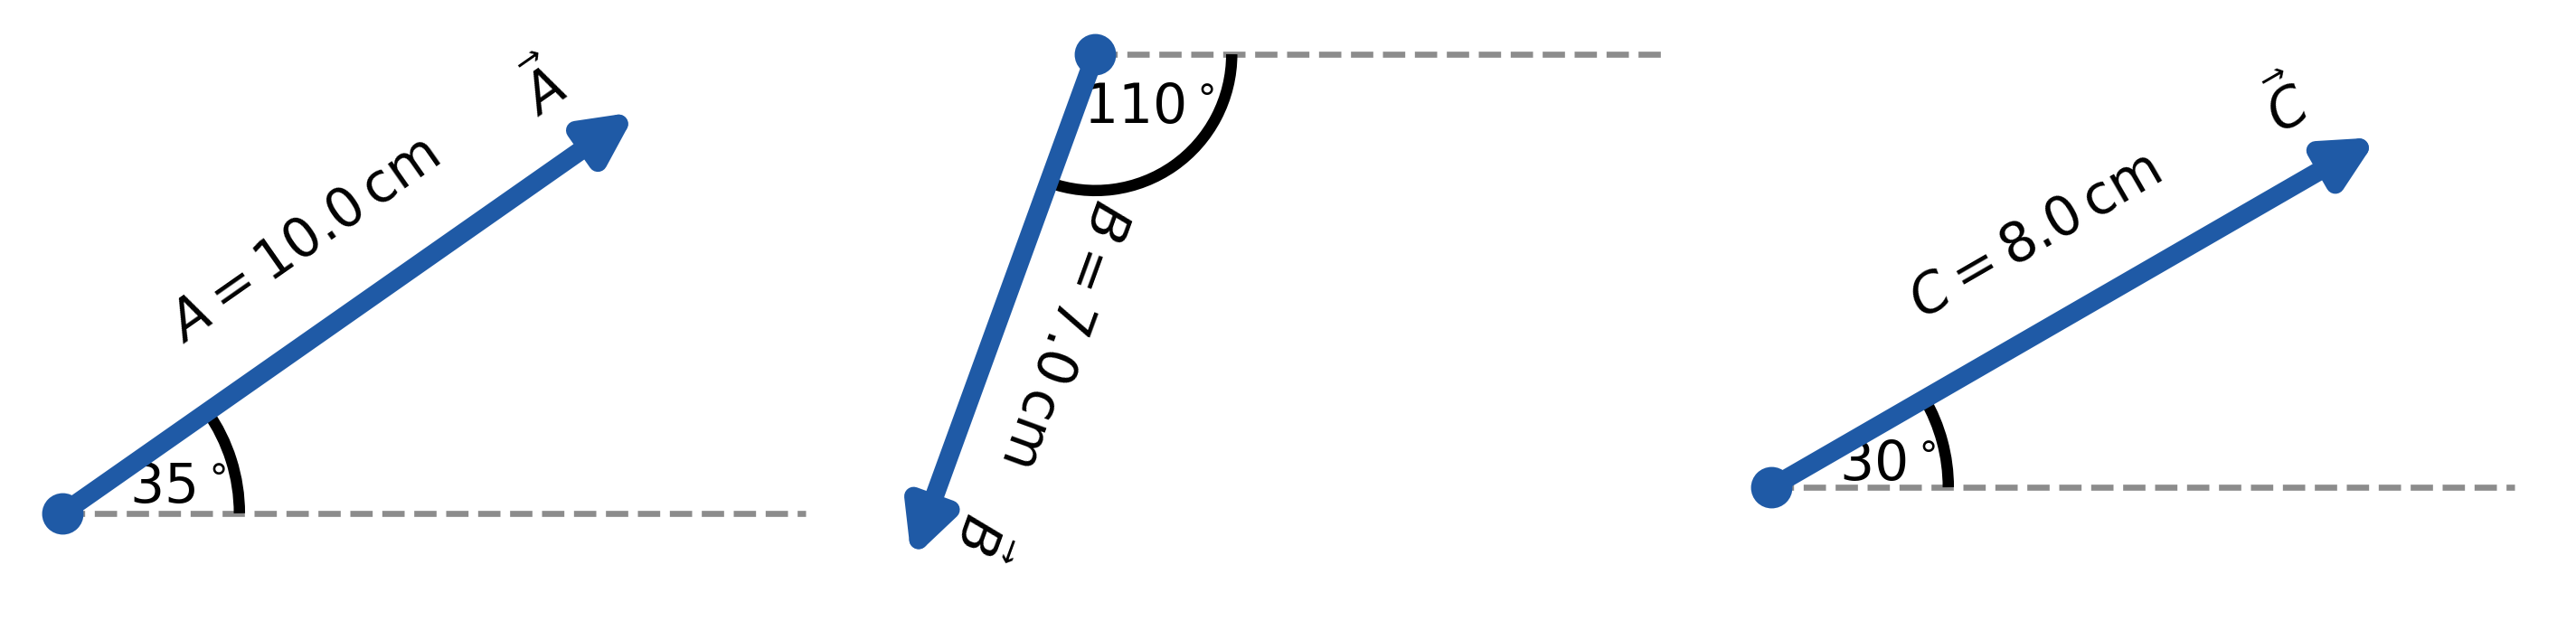

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import matplotlib as mpl
from myst_nb import glue

mpl.rcParams.update({
    "figure.dpi": 300,
    "savefig.dpi": 300,
    "font.size": 12,
    "mathtext.fontset": "dejavusans",
    "font.family": "DejaVu Sans",
    "axes.titlesize": 18,
    "axes.labelsize": 14,
})

def label_on_vector(ax, x0, y0, dx, dy, text, fontsize=18, offset=0.12, frac=0.55,
                    color="k", weight=None, rotate_with_vector=True):
    xm, ym = x0 + frac*dx, y0 + frac*dy
    nx, ny = -dy, dx
    n = (nx**2 + ny**2)**0.5
    nx, ny = (0.0, 0.0) if n == 0 else (nx/n, ny/n)
    ang = np.degrees(np.arctan2(dy, dx))
    rot = ang if rotate_with_vector else 0.0
    ax.text(xm + offset*nx, ym + offset*ny, text,
            rotation=rot, rotation_mode="anchor",
            ha="center", va="center",
            fontsize=fontsize, color=color, fontweight=weight, clip_on=False)

def draw_vector_panel(ax, mag, ang_deg, name, units="cm", vec_color="#1f5aa6"):
    th = np.deg2rad(ang_deg)
    vx, vy = mag*np.cos(th), mag*np.sin(th)

    ax.set_aspect("equal", adjustable="box")
    ax.set_xticks([]); ax.set_yticks([])
    for s in ax.spines.values(): s.set_visible(False)

    ax.plot([0, 1.05*mag], [0, 0], ls="--", lw=1.6, color="0.55", zorder=1)

    ax.annotate("", xy=(vx, vy), xytext=(0, 0),
                arrowprops=dict(arrowstyle="-|>", lw=5, color=vec_color, mutation_scale=26),
                zorder=4)
    ax.plot(0, 0, "o", ms=10, color=vec_color, zorder=5)

    arc_r = 0.50*mag 
    if ang_deg >= 0:
        t1, t2 = 0, ang_deg
        mid = np.deg2rad(0.5*ang_deg)
        ang_label = rf"${ang_deg:.0f}^\circ$"
    else:
        t1, t2 = ang_deg, 0
        mid = np.deg2rad(0.5*ang_deg)
        ang_label = rf"${abs(ang_deg):.0f}^\circ$"

    ax.add_patch(Arc((0, 0), arc_r, arc_r, theta1=t1, theta2=t2,
                     lw=3.0, color="k", zorder=3))
    ax.text(0.34*arc_r*np.cos(mid), 0.24*arc_r*np.sin(mid), ang_label, 
            fontsize=fs, ha="center", va="center", clip_on=False)

    # vector symbol (on the vector)
    label_on_vector(ax, 0, 0, 2*vx, 2*vy, rf"${name}$", fontsize=fs, offset=0.10*mag, frac=0.45)

    # --- magnitude label: centered + perpendicular offset above the vector ---
    name_mag = name[5:6]
    label_on_vector(ax, 0, 0, vx, vy, rf"${name_mag}={mag:.1f}\,\mathrm{{{units}}}$",
                    fontsize=fs, offset=0.12*mag, frac=0.50, rotate_with_vector=True)

    # limits + padding (extra to avoid clipping rotated text)
    xs = np.array([0, vx, 1.05*mag])
    ys = np.array([0, vy, 0])
    xmin, xmax = xs.min(), xs.max()
    ymin, ymax = ys.min(), ys.max()
    pad = 0.05*mag
    ax.set_xlim(xmin-pad, xmax+pad)
    ax.set_ylim(ymin-pad, ymax+pad)

fs = 'large'
A, alpha = 10.0, 35
B, beta  =  7.0, -110
C, gamma =  8.0, 30

fig, axes = plt.subplots(1, 3, figsize=(12, 8), dpi=300)
draw_vector_panel(axes[0], A, alpha, r"\vec{A}")
draw_vector_panel(axes[1], B, beta,  r"\vec{B}")
draw_vector_panel(axes[2], C, gamma, r"\vec{C}")

plt.subplots_adjust(wspace=0.05)
glue("vec_ABC", fig, display=False) 
fig.savefig("vectors.png", bbox_inches="tight", pad_inches=0.05)
plt.show()


#### **Example Problem**: Vector addition component-wise
````{exercise}
:class: etamu-exercise

**The Problem**

>Three displacement vectors $\vec{A}$, $\vec{B}$, and $\vec{C}$ lie in the horizontal plane.
>Their magnitudes are $A = 10.0\ \text{cm}$, $B = 7.0\ \text{cm}$, and $C = 8.0\ \text{cm}$,
>and their direction angles (measured counterclockwise from the positive $x$-axis) are
>$\alpha = 35^\circ$, $\beta = -110^\circ$, and $\gamma = 30^\circ$, respectively.
>
>Resolve each vector into its Cartesian components and determine the following:
>
>(a) $\vec{R} = \vec{A} + \vec{B} + \vec{C}$  
>(b) $\vec{D} = \vec{A} - \vec{B}$  
>(c) $\vec{S} = \vec{A} - 3\vec{B} + \vec{C}$

```{glue:figure} vec_ABC
:figwidth: 100%
:name: fig-vec-abc

```
---

**The Model**

We model each displacement vector using Cartesian components in the $x$–$y$ plane.
Each vector is resolved into horizontal ($\hat{i}$) and vertical ($\hat{j}$) components
using trigonometry. Vector addition and subtraction are then carried out component-by-component.

Once the components of each resultant vector are known, the vector can be written in
unit-vector form.

---
**The Math**

Each displacement vector is first resolved into Cartesian components using trigonometry.

For a vector of magnitude (V) making an angle (\theta) with the positive $x$-axis, the components are

\begin{align*}
V_x &= V\cos\theta, \\
V_y &= V\sin\theta.
\end{align*}

Applying this to vectors ($\vec{A}$, $\vec{B}$, and $\vec{C}$) yields their respective $x$- and $y$-components. Vector addition and subtraction are then performed **component by component**.  

The components of $\vec{A}$ are

\begin{align*}
A_x &= A\cos\alpha = (10.0)\cos 35^\circ = 8.19\ \text{cm}, \\
A_y &= A\sin\alpha = (10.0)\sin 35^\circ = 5.73\ \text{cm}.
\end{align*}

The components of $\vec{B}$ are

\begin{align*}
B_x &= B\cos\beta = (7.0)\cos(-110^\circ) = -2.39\ \text{cm}, \\
B_y &= B\sin\beta = (7.0)\sin(-110^\circ) = -6.58\ \text{cm}.
\end{align*}

The components of $\vec{C}$ are

\begin{align*}
C_x &= C\cos\gamma = (8.0)\cos 30^\circ = 6.93\ \text{cm}, \\
C_y &= C\sin\gamma = (8.0)\sin 30^\circ = 4.00\ \text{cm}.
\end{align*}

Once the components of a resultant vector are known, the vector is written in unit-vector form.  Its magnitude is found using the Pythagorean theorem, $|\vec{R}| = \sqrt{R_x^2 + R_y^2},$ and its direction angle is determined from $\theta = \tan^{-1}\left(\frac{R_y}{R_x}\right)$, with the appropriate quadrant correction applied.

**(a) Resultant $\vec{R} = \vec{A} + \vec{B} + \vec{C}$**

\begin{align*}
R_x &= A_x + B_x + C_x = 8.19 - 2.39 + 6.93 = 12.73\ \text{cm},\\
R_y &= A_y + B_y + C_y = 5.73 - 6.58 + 4.00 = 3.15\ \text{cm}.
\end{align*}

Thus,

$$\vec{R} = (12.7\,\hat{i} + 3.1\,\hat{j})\ \text{cm}.$$

**(b) Difference $\vec{D} = \vec{A} - \vec{B}$**

\begin{align*}
D_x &= A_x - B_x = 8.19 - (-2.39) = 10.58\ \text{cm}, \\
D_y &= A_y - B_y = 5.73 - (-6.58) = 12.31\ \text{cm}.
\end{align*}

Thus,

$$\vec{D} = (10.6\,\hat{i} + 12.3\,\hat{j})\ \text{cm}.$$

**(c) Combination $\vec{S} = \vec{A} - 3\vec{B} + \vec{C}$**

\begin{align*}
S_x &= A_x - 3B_x + C_x = 8.19 - 3(-2.39) + 6.93 = 22.29\ \text{cm}, \\
S_y &= A_y - 3B_y + C_y = 5.73 - 3(-6.58) + 4.00 = 29.47\ \text{cm}.
\end{align*}

Thus,

$$\vec{S} = (22.3\,\hat{i} + 29.5\,\hat{j})\ \text{cm}.$$

**Conclusion**

By resolving vectors into Cartesian components, vector addition and subtraction reduce to straightforward algebra. The analytical method provides exact results and avoids the geometric uncertainties inherent in graphical techniques.

---
**The Verification**

We can verify these results numerically by storing each vector as a NumPy array and performing the same component-wise operations.
````



In [52]:
import numpy as np

A = np.array([8.19, 5.73])
B = np.array([-2.39, -6.58])
C = np.array([6.93, 4.00])

R = A + B + C
D = A - B
S = A - 3*B + C

print("R =", R, "cm")
print("D =", D, "cm")
print("S =", S, "cm")

R = [12.73  3.15] cm
D = [10.58 12.31] cm
S = [22.29 29.47] cm


#### **Example Problem**: Tug-of-war game with Dug
````{exercise}
:class: etamu-exercise

**The Problem**

> Four dogs named Astro, Balto, Clifford, and Dug play a tug-of-war game with a toy. We define east as the positive $x$-direction and north as the positive $y$-direction.
>
> Astro pulls with a force of magnitude $A = 160.0,\text{N}$ at an angle $\alpha = 55^\circ$ south of east.
> Balto pulls with a force of magnitude $B = 200.0,\text{N}$ at an angle $\beta = 60^\circ$ east of north.
> Clifford pulls with a force of magnitude $C = 140.0,\text{N}$ at an angle $\gamma = 55^\circ$ west of north.
>
> Dug pulls on the toy in such a way that the toy does not move.
>
> What force must Dug apply (magnitude and direction) in order to keep the toy in equilibrium?

```{figure-md} dog-pull-problem
<img src="https://openstax.org/apps/image-cdn/v1/f=webp/apps/archive/20251118.192121/resources/21b8705d85d4a55c28cfdf0b9599623bca0767b5" alt="dog pull" width="450px">

Image Credit: OpenStax.
```

---

**The Model**

Each dog’s pull is modeled as a force vector in the $x$–$y$ plane. The toy remains at rest only if the vector sum of all forces acting on it is zero.

We first compute the resultant force of Astro, Balto, and Clifford:

$$ \vec{R} = \vec{A} + \vec{B} + \vec{C}. $$

For equilibrium, Dug’s force $\vec{D}$ must cancel this resultant. Therefore, Dug’s pull must be antiparallel to $\vec{R}$:

$$ \vec{D} = -\vec{R}. $$

---
**The Math**

We begin by converting all direction descriptions into standard angles measured counterclockwise from the positive $x$-axis:

* Astro: $\theta_A = -55^\circ$
* Balto: $\theta_B = 90^\circ - 60^\circ = 30^\circ$
* Clifford: $\theta_C = 90^\circ + 55^\circ = 145^\circ$

Next, we resolve each force into components:

\begin{align*}
A_x &= 160.0\cos(-55^\circ), &\quad A_y &= 160.0\sin(-55^\circ) \\
B_x &= 200.0\cos(30^\circ), &\quad B_y &= 200.0\sin(30^\circ) \\
C_x &= 140.0\cos(145^\circ), &\quad C_y &= 140.0\sin(145^\circ) 
\end{align*}

Numerically, this gives:

\begin{align*}
A_x &= +91.8 \text{N}, &\quad A_y &= -131.1 \text{N} \\
B_x &= +173.2 \text{N}, &\quad B_y &= +100.0 \text{N} \\
C_x &= -114.7 \text{N}, &\quad C_y &= +80.3 \text{N} 
\end{align*}

Now we compute the components of the resultant force:

\begin{align*}
R_x &= A_x + B_x + C_x = 150.3 \text{N} \\
R_y &= A_y + B_y + C_y = 49.2 \text{N}
\end{align*}

Thus, the resultant force is

$$ \vec{R} = (150.3\hat{i} + 49.2\hat{j})\ \text{N}. $$

Dug’s force must be equal in magnitude and opposite in direction:

$$ \vec{D} = (-150.3\hat{i} - 49.2\hat{j})\ \text{N}. $$

The magnitude of Dug’s force is

$$ D = \sqrt{(-150.3)^2 + (-49.2)^2} = 158.1 \text{N}. $$

The direction angle is

$$ \theta = \tan^{-1}\left(\frac{49.2}{150.3}\right) = 18.1^\circ. $$

Because both components of $\vec{D}$ are negative, the direction is **south of west**.

**Conclusion**

To keep the toy in equilibrium, Dug must pull with a force of magnitude **$158.1 \text{N}$** directed **$18.1^\circ$ south of west**.

---

**Verification (Python)**

The short Python script below computes the vector sum of the three dogs’ forces and confirms that Dug’s force is equal in magnitude and opposite in direction.
````


In [5]:
import numpy as np

A = 160*np.array([np.cos(np.radians(-55)), np.sin(np.radians(-55))])
B = 200*np.array([np.cos(np.radians(30)),  np.sin(np.radians(30))])
C = 140*np.array([np.cos(np.radians(145)), np.sin(np.radians(145))])

R = A + B + C
D = -R

D_mag = np.linalg.norm(D)
D_ang = np.degrees(np.arctan2(D[1], D[0])) + 180
print("Dug must pull with a force of magnitude: %4.1f N directed %2.1f south of west." % (D_mag,D_ang))

Dug must pull with a force of magnitude: 158.2 N directed 18.1 south of west.


#### **Example Problem**: 3D vector magnitude

````{exercise}
:class: etamu-exercise

**The Problem**

>Find the magnitude of the vector $\vec{C}$ that satisfies the vector equation
>
>$$ 2\vec{A} - 6\vec{B} + 3\vec{C} = 2\hat{j},$$
>
>where the known vectors are
>
>$$ \vec{A} = \hat{i} - 2\hat{k}, \qquad \vec{B} = -\hat{j} + \frac{1}{2}\hat{k}.$$

---

**The Model**

This is a three-dimensional vector equation written in the $\hat{i}$, $\hat{j}$, and $\hat{k}$ basis.
We solve algebraically for the unknown vector $\vec{C}$, identify its Cartesian components, and then compute its magnitude using the standard Euclidean norm.

---
**The Math**

We begin by isolating $\vec{C}$:

\begin{align*}
2\vec{A} - 6\vec{B} + 3\vec{C} &= 2\hat{j} \\
3\vec{C} &= 2\hat{j} - 2\vec{A} + 6\vec{B} \\
\vec{C} &= \frac{2}{3}\hat{j} - \frac{2}{3}\vec{A} + 2\vec{B}.
\end{align*}

Now substitute the given expressions for $\vec{A}$ and $\vec{B}$:

\begin{align*}
  \vec{C} &= \frac{2}{3}\hat{j} - \frac{2}{3}(\hat{i} - 2\hat{k}) + 2\left(-\hat{j} + \frac{1}{2}\hat{k}\right) \\
  &= -\frac{2}{3}\hat{i} + \left(\frac{2}{3} - 2\right)\hat{j} + \left(\frac{4}{3} + 1\right)\hat{k}.
\end{align*}

Thus, the scalar components of $\vec{C}$ are

$$ C_x = -\frac{2}{3}, \qquad C_y = -\frac{4}{3}, \qquad C_z = \frac{7}{3}. $$

The magnitude of $\vec{C}$ is

\begin{align*}
|\vec{C}| &= \sqrt{C_x^2 + C_y^2 + C_z^2} \\
&= \sqrt{\left(-\frac{2}{3}\right)^2 + \left(-\frac{4}{3}\right)^2 + \left(\frac{7}{3}\right)^2} \\
&= \sqrt{\frac{23}{3}}.
\end{align*}

**Conclusion**

The magnitude of the vector $\vec{C}$ is 

$$ |\vec{C}| = \sqrt{\frac{23}{3}}. $$

```{dropdown} **Frequent Mistake**
:color: warning

A frequent mistake in problems like this is **mixing up vector components with magnitudes**.

* $\hat{i}$, $\hat{j}$, and $\hat{k}$ are **directional basis vectors**, not numbers.
* In Python, they correspond to **array positions**, not separate variables.
* Writing something like `C = sqrt(Cx**2 + Cy**2 + Cz**2)` before identifying the components will lead to errors.

Always **solve for the vector first**, then compute its magnitude.
```

---

**The Verification**

In Python, vectors are naturally represented as NumPy arrays.
The unit vectors $\hat{i}$, $\hat{j}$, and $\hat{k}$ correspond directly to array indices `0`, `1`, and `2`, respectively.

```python
import numpy as np

# Define vectors using [i, j, k] → indices [0, 1, 2]
A = np.array([1, 0, -2])        # i - 2k
B = np.array([0, -1, 0.5])      # -j + (1/2)k

# Right-hand side vector: 2 j-hat
rhs = np.array([0, 2, 0])

# Solve for C from: 2A - 6B + 3C = 2j
C = (rhs - 2*A + 6*B) / 3

# Magnitude of C
C_mag = np.linalg.norm(C)

print(f"The vector C is {C} and its magnitude is {C_mag:.3f}.")
```
````

Sometimes we need to know just the direction of a vector, such as

- the direction of a magnetic field at some point, or
- the direction of motion of an object.

The unit vector gives a vector its direction and it is dimensionless (i.e., has no physical units).  When the vector lies along one of the axes in the coordinate system, finding the direction is simple.  Its direction either parallel or antiparallel to that coordinate axis.  For example, the direction of the vector $\vec{d} = -5\hat{i}\ {\rm m}$ is the unit vector $\hat{d} = -\hat{i}$ (i.e., $\vec{d} = 5\hat{d}\ {\rm m}$).

The general rule of finding the unit vector $\widehat{V}$ of a vector $\overrightarrow{V}$ is to divide it by its magnitude $V$:

\begin{align}
\widehat{V} &= \frac{\overrightarrow{V}}{V}.
\end{align}

#### **Example Problem**: Military convoy unit vector
````{exercise}
:class: etamu-exercise

**The Problem**

>A military convoy moves through unknown territory with velocity
>
>$$  \vec{v} = (4.0 \hat{i} + 3.0 \hat{j} + 0.10 \hat{k}) \ \text{km/h}. $$
>
>What is the **unit vector** that gives the direction of the convoy’s motion?

---

**The Model**

The unit vector in the direction of motion is a dimensionless vector that points in the same direction as the velocity vector.
It is obtained by dividing the velocity vector by its magnitude,

$$ \hat{v} = \frac{\vec{v}}{|\vec{v}|}. $$

---

**The Math**

First, compute the magnitude of the velocity vector:

$$ |\vec{v}| = \sqrt{v_x^2 + v_y^2 + v_z^2} = \sqrt{(4.0)^2 + (3.0)^2 + (0.10)^2}. $$

Evaluating,

$$ |\vec{v}| = \sqrt{25.01} \approx 5.0 \ \text{km/h}. $$

Now divide the vector by its magnitude to obtain the unit vector:

$$ \hat{v} = \frac{4.0 \hat{i} + 3.0 \hat{j} + 0.10 \hat{k}}{5.0}. $$

Thus,

$$ \hat{v} = 0.80 \hat{i} + 0.60 \hat{j} + 0.020 \hat{k}. $$

---

**Conclusion**

The unit vector describing the direction of the convoy’s motion is

$$ \boxed{\hat{v} = 0.80 \hat{i} + 0.60 \hat{j} + 0.020 \hat{k}}. $$

This vector has unit magnitude and encodes only the **direction**, not the speed.


```{warning}

A frequent mistake is to divide **only one component** of the vector by the magnitude.

A unit vector must preserve the *direction* of the original vector, so **every component must be divided by the same magnitude**. Forgetting this produces a vector that no longer points in the correct direction.
```

---

**Python Verification**

In Python, vectors are stored as arrays.
The unit vectors $\hat{i}$, $\hat{j}$, and $\hat{k}$ correspond to array indices **0, 1, and 2**, respectively.

```python
import numpy as np

# velocity vector components (km/h)
v = np.array([4.0, 3.0, 0.10])   # [i, j, k]

# compute magnitude
v_mag = np.linalg.norm(v)

# compute unit vector
v_hat = v / v_mag

print(f"The unit vector of the convoy's motion is {v_hat}.")
```
````

## Products of Vectors

A vector can be multiplied by another vector, **but may not be divided by another vector**.  There are two kinds of vector products:

- scalar multiplication ([dot product](https://en.wikipedia.org/wiki/Dot_product)), or
- vector multiplication ([cross product](https://en.wikipedia.org/wiki/Cross_product)).

As the names imply, the result of the multiplication produces either a scalar or a vector.

### The Dot Product
The **scalar product** of two vectors is denoted using $\cdot$ (`\cdot`) symbol instead of the normal $\times$ (`\times`) symbol.  The scalar product of vectors $\vec{A}$ and $\vec{B}$ is defined by

\begin{align}
\vec{A} \cdot \vec{B} = AB\cos{\varphi},
\end{align}

where the angle $\varphi$ represents an angle between the two vectors.

```{note}
In LaTeX, there are two versions of `phi`, which can include $\varphi$ (`\varphi`) or $\phi$ (`\phi`).  Both versions mean the same thing, but you need to be consistent. 
```

In the definition of the dot product, the direction of the angle $\varphi$ does not matter due to the property of $\cos{\varphi} = \cos{-\varphi}$ (i.e., cosine is an even function).  The dot product is a negative number in Quadrant II because $\cos{\varphi}<0$, when $\pi/2 < \varphi < \pi$, and $\cos{\varphi}>0$, when $0 < \varphi < \pi/2$.

When two vectors are parallel, the angle $\varphi = 0$ and $\vec{A} \cdot \vec{B} = AB\cos{0} = AB$.

**What happens when the vectors are antiparallel or perpendicular?**

- For antiparallel vectors, $\vec{A} \cdot \vec{B} = -AB$.
- for perpendicular (or orthogonal) vectors, $\vec{A} \cdot \vec{B} = 0$.

The scalar product of a vector with itself is the square of its magnitude:

\begin{align}
\vec{A}^2 &\equiv \vec{A} \cdot \vec{A} = AA\cos{0} = A^2.
\end{align}

### Rules using unit vectors

In the Cartesian coordinate system, scalar products of a unit vector with another (different) unit vector vanish because these unit vectors are **orthogonal**:

\begin{align}
\hat{i} \cdot \hat{j} &= \cos{\left(\frac{\pi}{2}\right)} = 0, \\
\hat{i} \cdot \hat{k} &= \cos{\left(\frac{\pi}{2}\right)} = 0, \\
\hat{k} \cdot \hat{j} &= \cos{\left(\frac{\pi}{2}\right)} = 0.
\end{align}

We often take advantage of the fact that the magnitudes of all unit vectors are one:

\begin{align}
|\hat{i}| &= \hat{i} \cdot \hat {i} = i^2 = 1, \\
|\hat{j}| &= \hat{j} \cdot \hat {j} = j^2 = 1, \\
|\hat{k}| &= \hat{k} \cdot \hat {k} = k^2 = 1. 
\end{align}

The scalar product is also interpreted as the *projection* of one vector onto the *direction* of the other vector (i.e., projection $A_{||}$ onto the direction of $\vec{B}$):

\begin{align}
\vec{A} \cdot \vec{B} &= AB\cos{\varphi}, \\
&= B(A\cos{\varphi}) = BA_{||}, \\
&= A(B\cos{\varphi}) = AB_{||}.
\end{align}

Recall the definitions of the vector components $A_x$ and $A_y$.  We can define these quantities through the dot product with the appropriate unit vector.  For example, using the vector $\vec{A} = A_x\hat{i} + A_y\hat{j}$:

\begin{align}
\vec{A}\cdot \hat{i} &= A_x (\hat{i} \cdot \hat{i}) + A_y (\hat{i}\cdot \hat{j}) = A_x \cos(0) + A_y \cos(\pi/2) = A_x, \\
\vec{A}\cdot \hat{j} &= A_x (\hat{j} \cdot \hat{i}) + A_y (\hat{j}\cdot \hat{j}) = A_x \cos(\pi/2) + A_y \cos(0) = A_y.
\end{align}

Scalar multiplication follows the previous properties of vector operation, where they are:

- commutative; $\vec{A} \cdot \vec{B} = \vec{B} \cdot \vec{A}$,
- distributive; $\vec{A} \cdot (\vec{B} + \vec{C}) = \vec{A}\cdot \vec{B} + \vec{A}\cdot \vec{C}$.

We can compute the scalar products of two vectors using the distributive property:

\begin{align*}
\vec{A}\cdot\vec{B} &= (A_x\hat{i} + A_y\hat{j} + A_z\hat{k}) \cdot (B_x\hat{i} + B_y\hat{j} + B_z\hat{k}) \\
&=\quad A_x B_x\, \hat{i}\cdot\hat{i}
 + A_x B_y\, \hat{i}\cdot\hat{j}
 + A_x B_z\, \hat{i}\cdot\hat{k} \\
&\quad + A_y B_x\, \hat{j}\cdot\hat{i}
 + A_y B_y\, \hat{j}\cdot\hat{j}
 + A_y B_z\, \hat{j}\cdot\hat{k} \\
&\quad + A_z B_x\, \hat{k}\cdot\hat{i}
 + A_z B_y\, \hat{k}\cdot\hat{j}
 + A_z B_z\, \hat{k}\cdot\hat{k}.
\end{align*}

Applying our rules for the dot products of unit vectors, the above expression simplifies quickly to 

\begin{align}
\vec{A}\cdot\vec{B} &= A_x B_x + A_yB_y + A_zB_z
\end{align}


If we know the magnitudes ($A$ and $B$) and the vector components of each vector, then we can solve for the angle $\varphi$ between them:

\begin{align}
\cos{\varphi}  &= \frac{\vec{A}\cdot \vec{B}}{AB} = \frac{A_x B_x + A_yB_y + A_zB_z}{AB}, \\
\varphi &= \cos^{-1}\left( \frac{A_x B_x + A_yB_y + A_zB_z}{AB}\right).
\end{align}

#### **Example Problem**: Angle between two forces

````{exercise}
:class: etamu-exercise

**The Problem**

> Three dogs are pulling on a stick in different directions. The first dog pulls with force  $\vec{F}_1 = (10.0\hat{i} - 20.4\hat{j} + 2.0\hat{k})\ \text{N},$ the second dog pulls with force $\vec{F}_2 = (-15.0\hat{i} - 6.2\hat{k})\ \text{N},$ and the third dog pulls with force $\vec{F}_3 = (5.0\hat{i} + 12.5\hat{j})\ \text{N}.$
>  
> What is the angle between the forces $\vec{F}_1$ and $\vec{F}_2$?

---

**The Model**

We treat each pull on the stick as a three-dimensional force vector expressed in Cartesian component form. The coordinate axes are arbitrary but fixed: the $\hat{i}$-, $\hat{j}$-, and $\hat{k}$-directions are mutually perpendicular and form a right-handed coordinate system.

The angle between two vectors is determined entirely by their components and magnitudes. We therefore model the angle between $\vec{F}_1$ and $\vec{F}_2$ using the **scalar (dot) product**, which relates the cosine of the angle between two vectors to their components.

---

**The Math**

The scalar product of two vectors is defined by $\vec{F}_1 \cdot \vec{F}_2 = F_1 F_2 \cos\varphi,$ where $\varphi$ is the angle between the vectors.  From the given component forms, the magnitudes of the two forces are

\begin{align*}
F_1 &= \sqrt{(10.0)^2 + (-20.4)^2 + (2.0)^2} = 22.8\ \text{N}, \\
F_2 &= \sqrt{(-15.0)^2 + (0.0)^2 + (-6.2)^2} = 16.2\ \text{N}.
\end{align*}

Their scalar product is

\begin{align*}
\vec{F}_1 \cdot \vec{F}_2
&= F_{1x}F_{2x} + F_{1y}F_{2y} + F_{1z}F_{2z} \\
&= (10.0)(-15.0) + (-20.4)(0.0) + (2.0)(-6.2) \\
&= -162.4\ \text{N}^2.
\end{align*}

Substituting into the scalar-product definition gives

\begin{align*}
\cos\varphi
&= \frac{\vec{F}_1 \cdot \vec{F}_2}{F_1 F_2}
= \frac{-162.4}{(22.8)(16.2)}
= -0.439.
\end{align*}

Taking the inverse cosine, $\varphi = \cos^{-1}(-0.439) = 116.0^\circ.$

---

**The Conclusion**

The angle between the forces $\vec{F}_1$ and $\vec{F}_2$ is  $\boxed{\varphi = 116.0^\circ}.$bbBecause the scalar product is negative, the angle between the two forces is **greater than $90^\circ$**, indicating that the dogs are pulling in substantially opposing directions.

---

**The Verification**

We can confirm this result numerically using Python by computing the dot product and magnitudes directly from the vector components.

```python
import numpy as np

F1 = np.array([10.0, -20.4, 2.0])
F2 = np.array([-15.0, 0.0, -6.2])

dot = np.dot(F1, F2)
angle = np.degrees(np.arccos(dot / (np.linalg.norm(F1) * np.linalg.norm(F2))))

print(f"The angle between F1 and F2 is {angle:.1f} degrees.")
```

This numerical result matches the analytical solution, reinforcing that the dot-product method depends only on vector components and not on any particular physical orientation of the coordinate axes.

````


### The Cross Product

The **vector product** yields (you guessed it) a vector.  The vector product of two vectors is denoted by $\vec{A} \times \vec{B}$ and is often called the **cross product**, due to the $\times$ (`\times`) operator.

The vector product produces a vector that is perpendicular to the plane containing both vectors.  The magnitude of the vector product is defined as

\begin{align}
|\vec{A} \times \vec{B}| = AB\sin{\varphi},
\end{align}

where $\varphi$ represents the angle measured between the two vectors.  In this case, the direction (i.e., sign) of $\varphi$ makes a difference because $\sin{(-\varphi)} = -\sin{(\varphi)}$ (an odd function).

In contrast to the scalar product, the vector product vanishes for pairs of vectors that are either parallel ($\varphi = 0$) or antiparallel ($\varphi = \pi$) because $\sin{\pi} = \sin{0} = 0$.

```{figure-md} cross-product-fig
<img src="https://openstax.org/apps/image-cdn/v1/f=webp/apps/archive/20251118.192121/resources/09287ffc5ac02dcbe2e759f44e887dd64a79188b" alt="cross product"  width="450px">

Image Credit: OpenStax.
```

The figure above shows that on the line perpendicular to the plane, there are two alternative directions.  In the standard right-handed orientation, where $\varphi$ is measured *counterclockwise* from the first vector, the resulting vector points upward.  If we reverse $\varphi$, then the resulting vector points downward.

This means the vector product is **anticommutative** because it reverses sign when the multiplication order is reversed:

\begin{align}
\vec{A} \times \vec{B} = -\vec{B} \times \vec{A}.
\end{align}


The [**right-hand rule**](https://en.wikipedia.org/wiki/Right-hand_rule) (shown below) helps determine the direction of the vector product, where one use the index finger for vector $\vec{A}$, middle finger for vector $\vec{B}$, and thumb for the vector product $\vec{A} \times \vec{B}$ on the right-hand.

```{figure-md} right-hand-rule
<img src="https://upload.wikimedia.org/wikipedia/commons/7/74/Right-hand_rule_for_cross_product.png" alt="right hand rule" width="500px">

Image Credit: Wikipedia:right_hand_rule; User:Sepitropova
```



Similar to the dot product, the cross product is distributive:

\begin{align}
\vec{A} \times (\vec{B} + \vec{C}) = (\vec{A} \times \vec{B}) + (\vec{A} \times \vec{C}).
\end{align}


When we apply the definition of the cross product to the Cartesian unit vectors $\hat{i}$, $\hat{j}$, and $\hat{k}$, we find that

\begin{align}
\hat{i} \times \hat{i} &= \hat{j} \times \hat{j} = \hat{k} \times \hat{k} = 0.
\end{align}

- **What makes this so?**

All other cross products must have a magnitude equal to unity because the unit vectors are orthogonal, e.g. $|\hat{i} \times \hat{j}| = ij\sin\left({\pi/2}\right) = 1$.  The vector product must be along the $z$-axis, following $-\hat{k}$ or $+\hat{k}$.  Following the right-hand rule, we arrive at the following relations:

\begin{align}
\hat{i} \times \hat{j} &= +\hat{k}, \\
\hat{j} \times \hat{k} &= +\hat{i}, \\
\hat{k} \times \hat{i} &= +\hat{j}.
\end{align}

The three unit vectors appear in a cyclic order to produce the next vector ($ijk \rightarrow jki$).  The figure below illustrates order of the unit vectors on a cube.

```{figure-md} cross-unit-vectors
<img src="https://openstax.org/apps/image-cdn/v1/f=webp/apps/archive/20251118.192121/resources/c230a29700d2e7243da1d79da0e6f5eeb3542dc8" alt="cross unit vectors" width="450px">

Image Credit: OpenStax
```

We can use the distributive property and unit-vector identities (**Method 1**) for the vector product as

\begin{align*}
\vec{A} \times \vec{B}
&= (A_x \hat{i} + A_y \hat{j} + A_z \hat{k})
   \times
   (B_x \hat{i} + B_y \hat{j} + B_z \hat{k}) \\[6pt]

&= \quad A_x B_x (\hat{i}\times\hat{i})
 + A_x B_y (\hat{i}\times\hat{j})
 + A_x B_z (\hat{i}\times\hat{k}) \\

&\quad + A_y B_x (\hat{j}\times\hat{i})
 + A_y B_y (\hat{j}\times\hat{j})
 + A_y B_z (\hat{j}\times\hat{k}) \\

&\quad + A_z B_x (\hat{k}\times\hat{i})
 + A_z B_y (\hat{k}\times\hat{j})
 + A_z B_z (\hat{k}\times\hat{k}) \\

&= (A_y B_z - A_z B_y)\hat{i}
 + (A_z B_x - A_x B_z)\hat{j}
 + (A_x B_y - A_y B_x)\hat{k}.
\end{align*}

Alternatively, we can use another method from matrix algebra (**Method 2**), where we block 1 row and column at a time and then cross-multiply:

\begin{align*}
\vec{A} \times \vec{B}
&=
\begin{vmatrix}
\hat{i} & \hat{j} & \hat{k} \\
A_x & A_y & A_z \\
B_x & B_y & B_z
\end{vmatrix} \\[6pt]

&= \hat{i}(A_y B_z - A_z B_y)
 - \hat{j}(A_x B_z - A_z B_x)
 + \hat{k}(A_x B_y - A_y B_x).
\end{align*}

Rewriting the $\hat{j}$ term with a positive coefficient gives

\begin{align*}
\vec{A} \times \vec{B}
&= (A_y B_z - A_z B_y)\hat{i}
 + (A_z B_x - A_x B_z)\hat{j}
 + (A_x B_y - A_y B_x)\hat{k}.
\end{align*}

```{warning}
When performing algebraic operations involving the cross product, **the order of multiplication matters** because it is anticommutative.
```

We can finally determine the vector $\vec{C} = \vec{A} \times \vec{B}$  in terms of its components:

\begin{align}
\vec{C} &= (A_y B_z - A_z B_y)\hat{i} + (A_z B_x - A_x B_z)\hat{j} + (A_x B_y - A_y B_x)\hat{k}, \\
&= C_x\hat{i} + C_y\hat{j} + C_z\hat{k}.
\end{align}


#### **Example Problem**: Wrench to loosen a nut
```{exercise}
:class: etamu-exercise

**The Problem**

> A wrench is used to loosen a rusty nut. A force of $20.0\ \text{N}$ is applied to the handle at a distance of $0.25\ \text{m}$ from the nut (see Figure {numref}`{number}<torque-product-fig>`).  
>  
> (a) If the force is applied at an angle $\varphi = 40^\circ$ relative to the wrench handle, what are the **magnitude and direction** of the torque applied to the nut?  
>  
> (b) How do the magnitude and direction of the torque change if the force is instead applied at $\varphi = 45^\circ$?  
>  
> (c) For what value of $\varphi$ does the torque have its **maximum magnitude**?

```{figure-md} torque-product-fig
<img src="https://openstax.org/apps/image-cdn/v1/f=webp/apps/archive/20251118.192121/resources/71b18a84c1ec9a347ae6c435fa65f619fca358bd" alt="torque product"  width="600px">

Image Credit: OpenStax.
```

---

**The Model**

We model the nut as a fixed pivot point and describe the wrench and applied force using vectors in a three-dimensional Cartesian coordinate system. The origin is placed at the nut, and the wrench lies in the $xy$-plane. The radial vector $\vec{R}$ points from the nut along the wrench handle to the point where the force is applied.

The applied force $\vec{F}$ also lies in the $xy$-plane and makes an angle $\varphi$ with $\vec{R}$. The torque exerted on the nut is defined as the vector cross product $\vec{\tau} = \vec{R} \times \vec{F}.$  Because both $\vec{R}$ and $\vec{F}$ lie in the $xy$-plane, the torque vector must point along the $z$-axis, either **out of the page** or **into the page**, depending on the sense of rotation.

---

**The Math**

The magnitude of the torque produced by a force applied at an angle $\varphi$ relative to the radial direction is $ \tau = RF\sin\varphi.$

For the given wrench, the force magnitude is $F = 20.0\ \text{N}$ and the distance from the pivot is $R = 0.25\ \text{m}$. When the force is applied at $\varphi = 40^\circ$, the torque magnitude is

$$ \tau = (0.25\ \text{m})(20.0\ \text{N})\sin 40^\circ = 3.21\ \text{N}\cdot\text{m}.$$


When the force is applied at $\varphi = 45^\circ$, the magnitude becomes

$$ \tau = (0.25\ \text{m})(20.0\ \text{N})\sin 45^\circ = 3.53\ \text{N}\cdot\text{m}. $$

The direction of the torque is determined by the right-hand rule applied to $\vec{R} \times \vec{F}$. In the first case, the torque vector points in the **positive $z$-direction** (out of the page). In the second case, the force orientation reverses the sense of rotation, and the torque vector points in the **negative $z$-direction** (into the page).

---

**The Conclusion**

Applying the force at a larger angle relative to the wrench handle increases the torque produced for the same force and lever arm. A force applied at $45^\circ$ produces a greater torque than one applied at $40^\circ$, even though the force magnitude and distance from the pivot are unchanged.

The direction of the torque depends on the rotational sense induced by the force, not simply on the magnitude of the force itself. In both cases, the torque acts perpendicular to the plane of the wrench.

---

**The Verification**

The torque reaches its maximum possible magnitude when $\sin\varphi = 1$, which occurs at $\varphi = 90^\circ$. Physically, this corresponds to applying the force **perpendicular** to the wrench handle. Under these conditions, the maximum torque is $ \tau_{\text{max}} = RF = (0.25\ \text{m})(20.0\ \text{N}) = 5.00\ \text{N}\cdot\text{m}.$

This confirms the intuitive result that a wrench is most effective when the applied force is perpendicular to the handle.
```


In [100]:
import numpy as np
import matplotlib.pyplot as plt

# Given physical parameters
R = 0.25        # lever arm (m)
F = 20.0        # applied force (N)

phi_deg = np.array([40, 45])        # angles in degrees
phi = np.radians(phi_deg)           # convert to radians

# Torque magnitudes
tau = R * F * np.sin(phi)

# Assign directions using right-hand rule convention
# Positive torque: out of the page (+k)
# Negative torque: into the page (-k)
tau_signed = np.array([+tau[0], -tau[1]])

# Print numerical verification
for i in range(len(phi_deg)):
    print(f"Angle = {phi_deg[i]:.0f}°")
    print(f"Torque magnitude = {tau[i]:.2f} N·m")
    print(f"Torque (signed) = {tau_signed[i]:+.2f} N·m\n")

Angle = 40°
Torque magnitude = 3.21 N·m
Torque (signed) = +3.21 N·m

Angle = 45°
Torque magnitude = 3.54 N·m
Torque (signed) = -3.54 N·m



## **Reference**: Vector Algebra

### Vector Notation
A vector in Cartesian form is written as

$$ \vec{A} = A_x \hat{i} + A_y \hat{j} + A_z \hat{k}, $$
where $\hat{i}$, $\hat{j}$, and $\hat{k}$ are unit vectors in the $x$, $y$, and $z$ directions.

---

### Vector Equality
Two vectors are equal **if and only if** their corresponding components are equal:

$$ \vec{A} = \vec{B} \quad \Longleftrightarrow \quad A_x = B_x,\; A_y = B_y,\; A_z = B_z. $$

---

### Vector Addition
Vectors add **component-wise**:

$$ \vec{A} + \vec{B} = (A_x + B_x)\hat{i} + (A_y + B_y)\hat{j} + (A_z + B_z)\hat{k}. $$

---

### Vector Subtraction
Vector subtraction is addition of the negative:

$$ \vec{A} - \vec{B} = \vec{A} + (-\vec{B}), $$

with

$$ -\vec{B} = (-B_x)\hat{i} + (-B_y)\hat{j} + (-B_z)\hat{k}. $$

---

### Magnitude of a Vector
The magnitude (length) of a vector is

$$ |\vec{A}| = \sqrt{A_x^2 + A_y^2 + A_z^2}. $$

---

### Unit Vector in the Direction of a Vector
The unit vector in the direction of $\vec{A}$ is

$$ \hat{A} = \frac{\vec{A}}{|\vec{A}|}. $$

---

### Scalar Multiplication
Multiplying a vector by a scalar $\alpha$ scales **all components**:

$$ \alpha \vec{A} = (\alpha A_x)\hat{i} + (\alpha A_y)\hat{j} + (\alpha A_z)\hat{k}. $$

- If $\alpha < 0$, the vector reverses direction.
- If $ 0< |\alpha| <1 $, the vector shrinks in magnitude.
- If $ |\alpha| > 1$, the vector grows in magnitude.

---

### Dot Product (Scalar Product)
The dot product of two vectors is

$$ \vec{A}\cdot\vec{B} = A_x B_x + A_y B_y + A_z B_z. $$

Equivalently,

$$ \vec{A}\cdot\vec{B} = |\vec{A}||\vec{B}|\cos\varphi, $$

where $\varphi$ is the angle between the vectors.

**Key properties:**
- $\vec{A}\cdot\vec{B} = \vec{B}\cdot\vec{A}$
- $\vec{A}\cdot\vec{A} = |\vec{A}|^2$
- If $\vec{A}\cdot\vec{B} = 0$, the vectors are perpendicular

---

### Unit Vector Dot Products
$$ \hat{i}\cdot\hat{i} = \hat{j}\cdot\hat{j} = \hat{k}\cdot\hat{k} = 1 $$
$$ \hat{i}\cdot\hat{j} = \hat{i}\cdot\hat{k} = \hat{j}\cdot\hat{k} = 0 $$

---

### Cross Product (Vector Product)
The cross product produces a **vector**:

$$ \vec{A}\times\vec{B} = \begin{vmatrix}
\hat{i} & \hat{j} & \hat{k} \\
A_x & A_y & A_z \\
B_x & B_y & B_z
\end{vmatrix}. $$

Magnitude: $ |\vec{A}\times\vec{B}| = |\vec{A}||\vec{B}|\sin\varphi. $

Direction is given by the **right-hand rule**.

---

### Unit Vector Cross Products
$$ \hat{i}\times\hat{j} = \hat{k}, \quad
\hat{j}\times\hat{k} = \hat{i}, \quad
\hat{k}\times\hat{i} = \hat{j} $$

Reversing the order introduces a minus sign.

---

### Direction Angles (3D)
If $\theta_x$, $\theta_y$, and $\theta_z$ are angles with the axes:

$$ \cos\theta_x = \frac{A_x}{|\vec{A}|}, \quad
\cos\theta_y = \frac{A_y}{|\vec{A}|}, \quad
\cos\theta_z = \frac{A_z}{|\vec{A}|}. $$

---

### Common Student Pitfalls ⚠️
- **Only match like components:** $A_x$ combines only with $B_x$, never with $B_y$ or $B_z$.
- **Dot vs cross:** Dot products give scalars; cross products give vectors.
- **Angles matter:** Direction angles must be measured from the correct axis.
- **Units first:** All components must share the same physical units before combining.


## **Reference**: Writing Vectors and Equations in LaTeX

This section summarizes the LaTeX commands used throughout this chapter.  
You are **not expected to memorize** this syntax. Use it as a reference.


---

### Vectors and Unit Vectors

Use \vec{} for vectors and \hat{} for unit vectors.

LaTeX source:
```latex
\vec{A}, \quad \hat{i}, \hat{j}, \hat{k}
```

Rendered: $ \vec{A}, \quad \hat{i}, \hat{j}, \hat{k} $

---

### Vector Components

A vector written in Cartesian (unit-vector) form:

LaTeX source:
```latex
\vec{A} = A_x \hat{i} + A_y \hat{j} + A_z \hat{k}
```

Rendered: $\vec{A} = A_x \hat{i} + A_y \hat{j} + A_z \hat{k}.$

---

### Magnitude of a Vector

LaTeX source: 
```latex
|\vec{A}| = \sqrt{A_x^2 + A_y^2 + A_z^2}
```
Rendered: $|\vec{A}| = \sqrt{A_x^2 + A_y^2 + A_z^2}.$

---

### Unit Vector in the Direction of a Vector

LaTeX source:
```latex
\hat{A} = \frac{\vec{A}}{|\vec{A}|}
```

Rendered: $\hat{A} = \frac{\vec{A}}{|\vec{A}|}.$

---

### Dot Product

LaTeX source:
```latex
\vec{A} \cdot \vec{B} = A_x B_x + A_y B_y + A_z B_z
```

Rendered: $\vec{A} \cdot \vec{B} = A_x B_x + A_y B_y + A_z B_z.$

---

### Multi-Line Algebra with align

LaTeX source:
```latex
\begin{align*}
\vec{C} &= \frac{2}{3}\hat{j} - \frac{2}{3}\vec{A} + 2\vec{B} \\
        &= -\frac{2}{3}\hat{i} - \frac{4}{3}\hat{j} + \frac{7}{3}\hat{k}
\end{align*}
```

Rendered:

\begin{align*}
\vec{C} &= \frac{2}{3}\hat{j} - \frac{2}{3}\vec{A} + 2\vec{B} \\
        &= -\frac{2}{3}\hat{i} - \frac{4}{3}\hat{j} + \frac{7}{3}\hat{k}
\end{align*}

---

### Python vs LaTeX Vector Notation

LaTeX:
```latex
\vec{A} = A_x \hat{i} + A_y \hat{j} + A_z \hat{k}
```

Python:
```python
A = np.array([Ax, Ay, Az])
```

Index mapping:

>A[0] -> A_x  
>A[1] -> A_y  
>A[2] -> A_z  



## In-class Problems

```{figure-md} vector-problems-fig
<img src="https://openstax.org/apps/image-cdn/v1/f=webp/apps/archive/20250916.165151/resources/dcfeaa77f2cf474e8c4cbb1f2d6744b27fc9a996" alt="vector problems"  width="450px">

Image Credit: OpenStax.
```

### Part 1
```{admonition} Problem 1
For the vectors given in the Fig. {numref}`{number}<vector-problems-fig>`, use a graphical method to find the following resultants:

a. $\vec{A} + \vec{B}$,  
b. $\vec{C} + \vec{B}$,  
c. $\vec{D} - \vec{F}$,  
d. $\vec{A} + 2\vec{F}$,  
e. $\vec{C} - 2\vec{D} + 3\vec{F}$.

*Note: Take pictures for your notebook writeup.*
```

```{admonition} Problem 2
In a tug-of-war game on one campus, 15 students pull on a rope at both ends in an effort to displace the central knot to one side or the other. Two students pull with force 196 N each to the right, four students pull with force 98 N each to the left, five students pull with force 62 N each to the left, three students pull with force 150 N each to the right, and one student pulls with force 250 N to the left. Assuming the positive direction to the right, express the net pull on the knot in terms of the unit vector. How big is the net pull on the knot? In what direction?
```

```{admonition} Problem 3
Assuming the +x-axis is horizontal and points to the right, resolve the vectors given in the Fig. {numref}`{number}<vector-problems-fig>` to their scalar components and express them in vector component form.
```

```{admonition} Problem 4
A scuba diver makes a slow descent into the depths of the ocean. His vertical position with respect to a boat on the surface changes several times. He makes the first stop 9.0 m from the boat but has a problem with equalizing the pressure, so he ascends 3.0 m and then continues descending for another 12.0 m to the second stop. From there, he ascends 4 m and then descends for 18.0 m, ascends again for 7 m and descends again for 24.0 m, where he makes a stop, waiting for his buddy. Assuming the positive direction up to the surface, express his net vertical displacement vector in terms of the unit vector. What is his distance to the boat?
```

```{admonition} Problem 5
Two points in a plane have polar coordinates  $P_1 (2.500\ \text{m},\ \pi/6) $ and  $P_2 (3.800\ \text{m},\ 2\pi/3)$. Determine their Cartesian coordinates and the distance between them in the Cartesian coordinate system. Round the distance to a nearest centimeter.
```

### Part 2



```{admonition} Problem 6
Given two displacement vectors  

$$\vec{A} = (3.00\hat{i} - 4.00\hat{j} + 4.00\hat{k})\,\text{m} \quad \text{and}$$
$$\vec{B} = (2.00\hat{i} + 3.00\hat{j} - 7.00\hat{k})\,\text{m},$$

find the displacements and their magnitudes for  

(a) $\vec{C} = \vec{A} + \vec{B}$,    and  
(b) $\vec{D} = 2\vec{A} - \vec{B}$.
```

```{admonition} Problem 7
An adventurous dog strays from home, runs three blocks east, two blocks north, and one block east, one block north, and two blocks west. Assuming that each block is about a 100 yd, use the analytical method to find the dog’s net displacement vector, its magnitude, and its direction. Assume the +x-axis is to the east. How would your answer be affected if each block was about 100 m?
```

```{admonition} Problem 8
Assuming the $+x$-axis is horizontal and points to the right, resolve the vectors given in Fig. {numref}`{number}<vector-problems-fig>` to their scalar components and express them in vector component form.
```

```{admonition} Problem 9
Assuming the $+x$-axis is horizontal to the right for the vectors in Fig. {numref}`{number}<vector-problems-fig>`, find the following vector products:

(a) $\vec{A} \times \vec{C}$,  
(b) $\vec{A} \times \vec{F}$,  
(c) $\vec{D} \times \vec{C}$,  
(d) $\vec{A} \times (\vec{F} + 2\vec{C})$,  
(e) $\hat{j} \times \vec{B}$,  
(f) $\hat{j} \times \vec{B}$,  
(g) $(3\hat{i} - \hat{j}) \times \vec{B}$, and  
(h) $\vec{B} \times \vec{B}$.
```